In [ ]:
! python main.py --dataset spurious --model 2-mlp-sim-bn --loss MSELoss --opt sgd --lr 0.01 --epoch 2000 --analysis loss eigs --batch_size 128 --sp_train_size 512

### Observation: feat size = 50 sam doesn't work! feat_size = 20 works.

In [ ]:
lr, dataset_name, opt_name, weight_decay, batch_size, train_size, epochs = 0.01, "spurious", "sam", 0, 128, 512, 4000
model_name = "2-mlp-sim-bn"
model_params = {}
#model_params["sgd"] = {"train_size": 512}
#model_params["norm-sgd"] = {"train_size": 512}
model_params[0.002] = {"feat_dim":50, "train_size": 512, "sam_rho":0.002}
model_params[0.02] = {"feat_dim":50, "train_size": 512, "sam_rho":0.02}
model_params[0.2] = {"feat_dim":50, "train_size": 512, "sam_rho":0.2}
#directory = get_directory(lr, model_name, weight_decay, batch_size, epochs, **model_params)

#with open(f'../{directory}train_graphs.pk', 'rb') as f:
#    train_graphs = pickle.load(f)

plot_figures_rhos([0.002, 0.02, 0.2], model_params)

In [ ]:
! python main.py --dataset spurious --model 2-mlp-sim-bn --loss MSELoss --opt sam --lr 0.01 --epoch 4000 --analysis loss eigs --batch_size 128 --sp_train_size 512 --sp_feat_dim 20 --sam_rho 0.2

In [ ]:
lr, dataset_name, opt_name, weight_decay, batch_size, train_size, epochs = 0.01, "spurious", "sam", 0, 128, 512, 4000
model_name = "2-mlp-sim-bn"
model_params = {}
model_params["sam"] = {"feat_dim":50, "train_size": 512, "sam_rho":0.02}
model_params["sgd"] = {"feat_dim":50, "train_size": 512}
model_params["norm-sgd"] = {"feat_dim":50, "train_size": 512}

plot_figures_opts(["sam", "sgd", "norm-sgd"], model_params)

In [ ]:
lr, dataset_name, opt_name, weight_decay, batch_size, train_size, epochs = 0.01, "spurious", "sam", 0, 32, 128, 8000
model_name = "2-mlp-sim-bn"
model_params = {}
model_params["sam"] = {"feat_dim":50, "train_size": train_size, "sam_rho":0.02}
model_params["sgd"] = {"feat_dim":50, "train_size": train_size}
model_params["norm-sgd"] = {"feat_dim":50, "train_size": train_size}

plot_figures_opts(["sam", "sgd", "norm-sgd"], model_params)

In [ ]:
lr, dataset_name, opt_name, weight_decay, batch_size, train_size, epochs = 0.01, "spurious", "sam", 0, 16, 64, 4000
model_name = "2-mlp-sim-bn"
model_params = {}
model_params["sam"] = {"feat_dim":50, "train_size": train_size, "sam_rho":0.2}
model_params["sgd"] = {"feat_dim":50, "train_size": train_size}
model_params["norm-sgd"] = {"feat_dim":50, "train_size": train_size}

plot_figures_opts(["norm-sgd","sgd","sam"], model_params)

In [ ]:
lr, dataset_name, opt_name, weight_decay, batch_size, train_size, epochs = 0.01, "spurious", "sgd", 0, 1, 64, 4000
model_name = "2-mlp-sim-bn"
model_params = {}
#model_params["sgd"] = {"train_size": 512}
#model_params["norm-sgd"] = {"train_size": 512}
model_params[0.01] = {"feat_dim":50, "train_size": train_size}
model_params[0.02] = {"feat_dim":50,"train_size": train_size}
model_params[0.002] = {"feat_dim":50,"train_size": train_size}
model_params[0.0005] = {"feat_dim":50,"train_size": train_size}
#directory = get_directory(lr, model_name, weight_decay, batch_size, epochs, **model_params)

#with open(f'../{directory}train_graphs.pk', 'rb') as f:
#    train_graphs = pickle.load(f)

plot_figures_lrs([0.0005, 0.002, 0.01, 0.02], model_params)

In [ ]:
! python main.py --dataset spurious --model 2-mlp-sim-ln --loss MSELoss --opt sam --lr 0.01 --epoch 4000 --analysis loss eigs --batch_size 32 --sp_train_size 128 --sp_feat_dim 50 --sam_rho 0.2

In [ ]:
lr, dataset_name, opt_name, weight_decay, batch_size, train_size, epochs = 0.01, "spurious", "sam", 0, 32, 128, 4000
model_name = "2-mlp-sim-ln"
model_params = {}
model_params["sam"] = {"feat_dim":50, "train_size": train_size, "sam_rho":0.2}
#model_params["sam-0.05"] = {"feat_dim":50, "train_size": train_size, "sam_rho":0.05}
model_params["sgd"] = {"feat_dim":50, "train_size": train_size}
model_params["norm-sgd"] = {"norm_lr": 0.05, "feat_dim":50, "train_size": train_size}

plot_figures_opts(["norm-sgd","sgd","sam"], model_params)

In [ ]:
lr, dataset_name, opt_name, weight_decay, batch_size, train_size, epochs = 0.01, "spurious", "sam", 0, 32, 128, 4000
model_name = "2-mlp-sim-ln"
model_params = {}
#model_params["sam"] = {"feat_dim":50, "train_size": train_size, "sam_rho":0.2}
model_params["sam"] = {"feat_dim":50, "train_size": train_size, "sam_rho":0.05}
model_params["sgd"] = {"feat_dim":50, "train_size": train_size}
model_params["norm-sgd"] = {"norm_lr": 0.05, "feat_dim":50, "train_size": train_size}

plot_figures_opts(["norm-sgd","sgd","sam"], model_params)

In [ ]:
! python main.py --dataset spurious --model 2-mlp-sim-ln --loss MSELoss --opt sam --lr 0.01 --epoch 4000 --analysis loss eigs adv_eigs --batch_size 64 --sp_train_size 512 --sp_feat_dim 30 --sam_rho 0.05 --adv_eta 0.01

In [ ]:
from plot_functions import plot_figures_opts
from main import graphs
lr, dataset_name, loss_name, opt_name, momentum, weight_decay, batch_size, train_size, epochs = 0.01, "spurious", "MSELoss", "sam", 0, 0, 64, 512, 4000
model_name = "2-mlp-sim-ln"
model_params = {}
#model_params["sam"] = {"feat_dim":50, "train_size": train_size, "sam_rho":0.2}
model_params["sam"] = {"feat_dim":30, "train_size": train_size, "sam_rho":0.05}
model_params["sgd"] = {"feat_dim":30, "train_size": train_size}
model_params["norm-sgd-0.05"] = {"norm_lr": 0.05, "feat_dim":30, "train_size": train_size}

opt_params = {}
opt_params['sam'] = {"adv_eta":0.01, 'lr': lr, 'dataset_name':dataset_name, 'loss': loss_name, 'opt':'sam', 'model_name':model_name, 'momentum':momentum, 'weight_decay':weight_decay, 'batch_size':batch_size, 'epochs':epochs}
opt_params['norm-sgd-0.05'] = {"adv_eta":0.01, 'lr': lr, 'dataset_name':dataset_name, 'loss': loss_name, 'opt':'norm-sgd', 'model_name':model_name, 'momentum':momentum, 'weight_decay':weight_decay, 'batch_size':batch_size, 'epochs':epochs}

plot_figures_opts(["sam", "norm-sgd-0.05"], model_params, opt_params)

In [ ]:
lr, dataset_name, opt_name, weight_decay, batch_size, epochs = 0.004, "cifar", "sam", 0, 512, 2000
model_name = "resnet18"
model_params = {}
model_params["sam"] = {"sam_rho":0.02}
model_params["sgd"] = {}
model_params["norm-sgd"] = {"norm_lr": 1e-3}

plot_figures_opts(["norm-sgd","sgd", "sam"], model_params)

In [ ]:
! python main.py --dataset cifar --model resnet18 --loss MSELoss --opt sam --lr 0.004 --epoch 2000 --analysis loss eigs --batch_size 512 --sam_rho 0.05 --weight_decay 0.0005

In [ ]:
! python main.py --dataset cifar --model WideResNet --loss CrossEntropyLoss --opt sam --lr 0.01 --epoch 200 --analysis loss eigs --log_interval 10 --batch_size 512 --sam_rho 0.05 --momentum 0.9
! python main.py --dataset cifar --model WideResNet --loss CrossEntropyLoss --opt norm-sgd --lr 0.01 --epoch 200 --analysis loss eigs adv_eigs --log_interval 10 --batch_size 512 --momentum 0.9 --norm_sgd_lr 0.001
! python main.py --dataset cifar --model WideResNet --loss CrossEntropyLoss --opt sam --lr 0.01 --epoch 200 --analysis loss eigs adv_eigs --log_interval 10 --batch_size 512 --momentum 0.9 --base_opt adam --sam_rho 0.005 --sam_adaptive 1 --adv_eta 0.01

In [ ]:
lr, dataset_name, loss_name, opt_name, weight_decay, batch_size, epochs = 0.01, "cifar", "CrossEntropyLoss", "sam", 0, 512, 200
model_name = "WideResNet"
model_params = {}
model_params["sam"] = {"sam_rho":0.05}
model_params["sgd"] = {}
model_params["norm-sgd"] = {"norm_lr": 1e-3}

plot_figures_opts(["sam","sgd", "norm-sgd"], model_params)

In [ ]:
! python main.py --dataset cifar --model WideResNet --loss CrossEntropyLoss --opt sam --lr 0.01 --epoch 200 --analysis loss eigs adv_eigs --log_interval 10 --batch_size 128 --sam_rho 0.1 --momentum 0.9 --weight_decay 0.0005 --adv_eta 0.01 --base_opt sgd
! python main.py --dataset cifar --model WideResNet --loss CrossEntropyLoss --opt adahessian --lr 0.01 --epoch 200 --analysis loss eigs adv_eigs --log_interval 10 --batch_size 128 --sam_rho 0.1 --momentum 0.9 --weight_decay 0.0005 --adv_eta 0.01 --base_opt sgd

results/cifar/CrossEntropyLoss/sgd/WideResNet/width_8/lr_0.01/moment_0.9/wd_0.0005/batch_size_128/epoch_200/run_0/
results/cifar/CrossEntropyLoss/norm-sgd/WideResNet/width_8/base_opt_sgd/norm_lr_0.001/lr_0.01/moment_0.9/wd_0.0005/batch_size_128/epoch_200/run_0/
results/cifar/CrossEntropyLoss/sam/WideResNet/width_8/base_opt_sgd/sam_rho_0.1/lr_0.01/moment_0.9/wd_0.0005/batch_size_128/epoch_200/run_0/
results/cifar/CrossEntropyLoss/adahessian/WideResNet/width_8/lr_0.01/moment_0.9/wd_0.0005/batch_size_128/epoch_200/run_0/


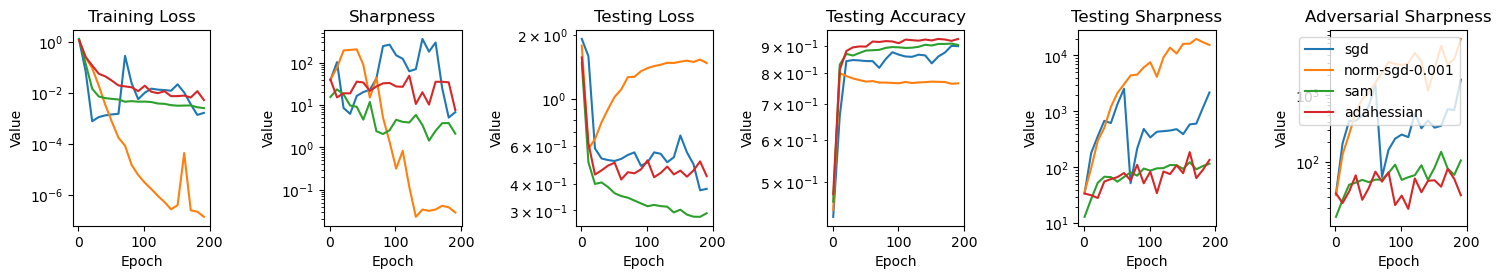

In [16]:
from plot_functions import plot_figures_opts
from main import graphs

lr, dataset_name, loss_name, momentum, weight_decay, batch_size, width_factor, epochs = 0.01, "cifar", 'CrossEntropyLoss', 0.9, 0.0005, 128, 8, 200
model_name = "WideResNet"
model_params = {}
#model_params["sam"] = {"feat_dim":50, "train_size": train_size, "sam_rho":0.2}
model_params["sam"] = {"width": width_factor, "base_opt": "sgd","sam_rho":0.1}
#model_params["sam"] = {"base_opt": "adam","sam_rho":2.0, "sam": "adaptive"}
model_params["sgd"] = {"width": width_factor}
model_params["norm-sgd-0.001"] = {'width':width_factor, "base_opt": "sgd", "norm_lr": 0.001}
model_params["adahessian"] = {"width":width_factor}
#model_params["norm-sgd-0.1"] = {"norm_lr": 0.05, "feat_dim":30, "train_size": train_size}

opt_params = {}
opt_params['sam'] = {"adv_eta":0.01, 'lr': lr, 'dataset_name':dataset_name, 'loss': loss_name, 'opt':'sam', 'model_name':model_name, 'momentum':momentum, 'weight_decay':0.0005, 'batch_size':128, 'epochs':epochs}
opt_params['sgd'] = {"adv_eta":0.01, 'lr': lr, 'dataset_name':dataset_name, 'loss': loss_name, 'opt':'sgd', 'model_name':model_name, 'momentum':momentum, 'weight_decay':weight_decay, 'batch_size':batch_size, 'epochs':epochs}
opt_params['norm-sgd-0.001'] = {"adv_eta":0.01, 'lr': lr, 'dataset_name':dataset_name, 'loss': loss_name, 'opt':'norm-sgd', 'model_name':model_name, 'momentum':momentum, 'weight_decay':weight_decay, 'batch_size':batch_size, 'epochs':epochs}
opt_params['norm-sgd-0.1'] = {"adv_eta":0.01, 'lr': lr, 'dataset_name':dataset_name, 'loss': loss_name, 'opt':'norm-sgd', 'model_name':model_name, 'momentum':momentum, 'weight_decay':weight_decay, 'batch_size':batch_size, 'epochs':epochs}
opt_params['adahessian'] = {"adv_eta":0.01, 'lr': lr, 'dataset_name':dataset_name, 'loss': loss_name, 'opt':'adahessian', 'model_name':model_name, 'momentum':momentum, 'weight_decay':weight_decay, 'batch_size':batch_size, 'epochs':epochs}

plot_figures_opts(["sgd", "norm-sgd-0.001", "sam", 'adahessian'], model_params, opt_params)

results/cifar/CrossEntropyLoss/adahessian/WideResNet/width_8/lr_0.01/moment_0.9/wd_0.0005/batch_size_128/epoch_200/run_0/
results/cifar/CrossEntropyLoss/adahessian/WideResNet/width_8/lr_0.05/moment_0.9/wd_0.0005/batch_size_128/epoch_100/run_0/
results/cifar/CrossEntropyLoss/adahessian/WideResNet/width_8/lr_0.1/moment_0.9/wd_0.0005/batch_size_128/epoch_100/run_0/


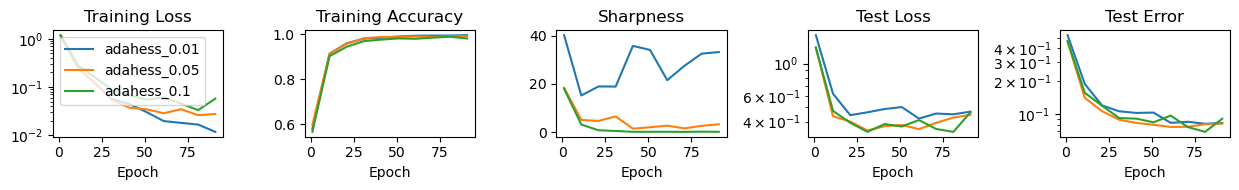

In [2]:
from plot_functions import plot_figures_opts_attrs
from main import graphs

lr, dataset_name, loss_name, momentum, weight_decay, batch_size, width_factor, epochs = 0.01, "cifar", 'CrossEntropyLoss', 0.9, 0.0005, 128, 8, 100
model_name = "WideResNet"
model_params = {}
model_params["adahess_0.01"] = {"width": width_factor}
model_params["adahess_0.05"] = {"width": width_factor}
model_params["adahess_0.1"] = {"width": width_factor}

opt_params = {}
opt_params['adahess_0.01'] = {"adv_eta":0.01, 'lr': 0.01, 'dataset_name':dataset_name, 'loss': loss_name, 'opt':'adahessian', 'model_name':model_name, 'momentum':momentum, 'weight_decay':weight_decay, 'batch_size':batch_size, 'epochs':200}
opt_params['adahess_0.05'] = {"adv_eta":0.01, 'lr': 0.05, 'dataset_name':dataset_name, 'loss': loss_name, 'opt':'adahessian', 'model_name':model_name, 'momentum':momentum, 'weight_decay':weight_decay, 'batch_size':batch_size, 'epochs':epochs}
opt_params['adahess_0.1'] = {"adv_eta":0.01, 'lr': 0.1, 'dataset_name':dataset_name, 'loss': loss_name, 'opt':'adahessian', 'model_name':model_name, 'momentum':momentum, 'weight_decay':weight_decay, 'batch_size':batch_size, 'epochs':epochs}

plot_figures_opts_attrs(['adahess_0.01', 'adahess_0.05', 'adahess_0.1'], model_params, opt_params, attrs=["loss", "acc", "test_loss", "test_err", "eigs"], end=10)

In [ ]:
for momentum in 0.9 0 0.5
do
    for batch in 128 256 512
    do
        for lr in 0.01 0.05 0.1
        do
            python main.py --dataset cifar --model WideResNet --loss CrossEntropyLoss --opt sgd --lr $lr --epoch 50 --analysis loss --log_interval 5 --batch_size $batch --momentum $momentum --run_from_scratch 1
        done
    done
done

results/cifar/CrossEntropyLoss/sgd/WideResNet/width_8/lr_0.01/moment_0.9/wd_0/batch_size_128/epoch_50/run_0/
results/cifar/CrossEntropyLoss/sgd/WideResNet/width_8/lr_0.01/moment_0.9/wd_0/batch_size_256/epoch_50/run_0/
results/cifar/CrossEntropyLoss/sgd/WideResNet/width_8/lr_0.01/moment_0.9/wd_0/batch_size_512/epoch_50/run_0/


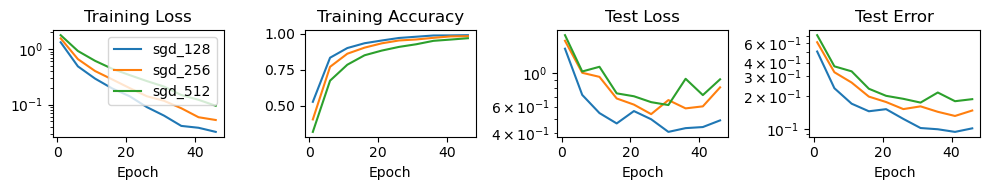

In [32]:
from plot_functions import plot_figures_opts_attrs
from main import graphs

lr, dataset_name, loss_name, momentum, weight_decay, batch_size, width_factor, epochs = 0.01, "cifar", 'CrossEntropyLoss', 0.9, 0, 128, 8, 50
model_name = "WideResNet"
model_params = {}
model_params["sgd_128"] = {"width": width_factor}
model_params["sgd_256"] = {"width": width_factor}
model_params["sgd_512"] = {"width": width_factor}

opt_params = {}
opt_params['sgd_128'] = {"adv_eta":0.01, 'lr': lr, 'dataset_name':dataset_name, 'loss': loss_name, 'opt':'sgd', 'model_name':model_name, 'momentum':momentum, 'weight_decay':weight_decay, 'batch_size':128, 'epochs':epochs}
opt_params['sgd_256'] = {"adv_eta":0.01, 'lr': lr, 'dataset_name':dataset_name, 'loss': loss_name, 'opt':'sgd', 'model_name':model_name, 'momentum':momentum, 'weight_decay':weight_decay, 'batch_size':256, 'epochs':epochs}
opt_params['sgd_512'] = {"adv_eta":0.01, 'lr': lr, 'dataset_name':dataset_name, 'loss': loss_name, 'opt':'sgd', 'model_name':model_name, 'momentum':momentum, 'weight_decay':weight_decay, 'batch_size':512, 'epochs':epochs}

plot_figures_opts_attrs(["sgd_128", 'sgd_256', 'sgd_512'], model_params, opt_params, attrs=["loss", "acc", "test_loss", "test_err"])

results/cifar/CrossEntropyLoss/sgd/WideResNet/width_8/lr_0.1/moment_0.9/wd_0/batch_size_128/epoch_50/run_0/
results/cifar/CrossEntropyLoss/sgd/WideResNet/width_8/lr_0.1/moment_0.9/wd_0/batch_size_256/epoch_50/run_0/
results/cifar/CrossEntropyLoss/sgd/WideResNet/width_8/lr_0.1/moment_0.9/wd_0/batch_size_512/epoch_50/run_0/


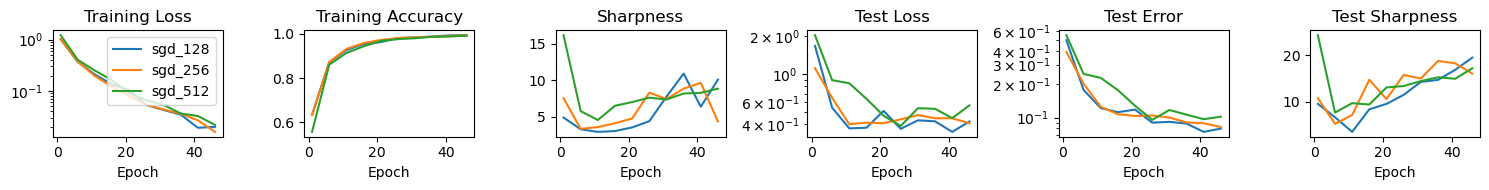

In [7]:
from plot_functions import plot_figures_opts_attrs
from main import graphs

lr, dataset_name, loss_name, momentum, weight_decay, batch_size, width_factor, epochs = 0.1, "cifar", 'CrossEntropyLoss', 0.9, 0, 128, 8, 50
model_name = "WideResNet"
model_params = {}
model_params["sgd_128"] = {"width": width_factor}
model_params["sgd_256"] = {"width": width_factor}
model_params["sgd_512"] = {"width": width_factor}

opt_params = {}
opt_params['sgd_128'] = {"adv_eta":0.01, 'lr': lr, 'dataset_name':dataset_name, 'loss': loss_name, 'opt':'sgd', 'model_name':model_name, 'momentum':momentum, 'weight_decay':weight_decay, 'batch_size':128, 'epochs':epochs}
opt_params['sgd_256'] = {"adv_eta":0.01, 'lr': lr, 'dataset_name':dataset_name, 'loss': loss_name, 'opt':'sgd', 'model_name':model_name, 'momentum':momentum, 'weight_decay':weight_decay, 'batch_size':256, 'epochs':epochs}
opt_params['sgd_512'] = {"adv_eta":0.01, 'lr': lr, 'dataset_name':dataset_name, 'loss': loss_name, 'opt':'sgd', 'model_name':model_name, 'momentum':momentum, 'weight_decay':weight_decay, 'batch_size':512, 'epochs':epochs}

plot_figures_opts_attrs(["sgd_128", "sgd_256", "sgd_512"], model_params, opt_params, attrs=["loss", "acc", "test_loss", "test_err", "eigs", "test_eigs"])

results/cifar/CrossEntropyLoss/sgd/WideResNet/width_8/lr_0.01/moment_0.9/wd_0/batch_size_256/epoch_50/run_0/
results/cifar/CrossEntropyLoss/sgd/WideResNet/width_8/lr_0.05/moment_0.9/wd_0/batch_size_256/epoch_50/run_0/
results/cifar/CrossEntropyLoss/sgd/WideResNet/width_8/lr_0.1/moment_0.9/wd_0/batch_size_256/epoch_50/run_0/


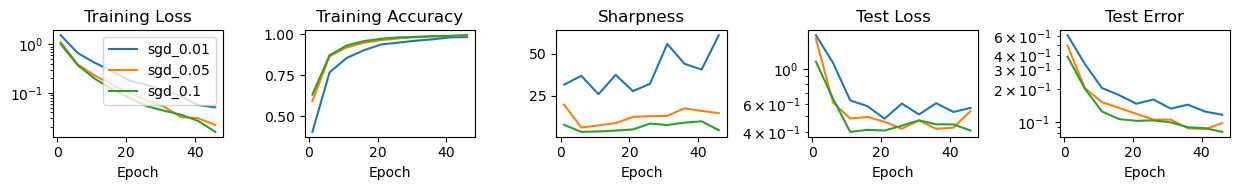

In [12]:
from plot_functions import plot_figures_opts_attrs
from main import graphs

lr, dataset_name, loss_name, momentum, weight_decay, batch_size, width_factor, epochs = 0.01, "cifar", 'CrossEntropyLoss', 0.9, 0, 256, 8, 50
model_name = "WideResNet"
model_params = {}
model_params["sgd_0.01"] = {"width": width_factor}
model_params["sgd_0.05"] = {"width": width_factor}
model_params["sgd_0.1"] = {"width": width_factor}

opt_params = {}
opt_params['sgd_0.01'] = {"adv_eta":0.01, 'lr': 0.01, 'dataset_name':dataset_name, 'loss': loss_name, 'opt':'sgd', 'model_name':model_name, 'momentum':momentum, 'weight_decay':weight_decay, 'batch_size':batch_size, 'epochs':epochs}
opt_params['sgd_0.05'] = {"adv_eta":0.01, 'lr': 0.05, 'dataset_name':dataset_name, 'loss': loss_name, 'opt':'sgd', 'model_name':model_name, 'momentum':momentum, 'weight_decay':weight_decay, 'batch_size':batch_size, 'epochs':epochs}
opt_params['sgd_0.1'] = {"adv_eta":0.01, 'lr': 0.1, 'dataset_name':dataset_name, 'loss': loss_name, 'opt':'sgd', 'model_name':model_name, 'momentum':momentum, 'weight_decay':weight_decay, 'batch_size':batch_size, 'epochs':epochs}

plot_figures_opts_attrs(["sgd_0.01", 'sgd_0.05', 'sgd_0.1'], model_params, opt_params, attrs=["loss", "acc", "test_loss", "test_err","eigs"])

results/cifar/CrossEntropyLoss/sgd/WideResNet/width_8/lr_0.01/moment_0.9/wd_0/batch_size_256/epoch_50/run_0/
results/cifar/CrossEntropyLoss/sgd/WideResNet/width_8/lr_0.05/moment_0.9/wd_0/batch_size_256/epoch_50/run_0/
results/cifar/CrossEntropyLoss/sgd/WideResNet/width_8/lr_0.1/moment_0.9/wd_0/batch_size_256/epoch_50/run_0/


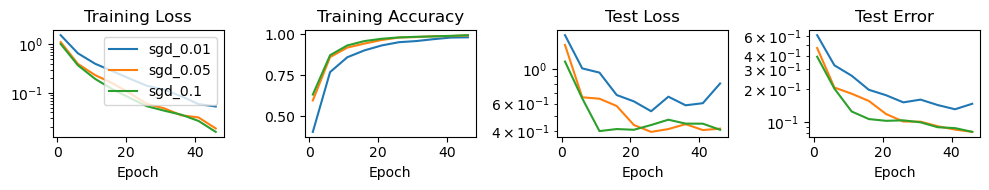

In [35]:
from plot_functions import plot_figures_opts_attrs
from main import graphs

lr, dataset_name, loss_name, momentum, weight_decay, batch_size, width_factor, epochs = 0.01, "cifar", 'CrossEntropyLoss', 0.9, 0, 256, 8, 50
model_name = "WideResNet"
model_params = {}
model_params["sgd_0.01"] = {"width": width_factor}
model_params["sgd_0.05"] = {"width": width_factor}
model_params["sgd_0.1"] = {"width": width_factor}

opt_params = {}
opt_params['sgd_0.01'] = {"adv_eta":0.01, 'lr': 0.01, 'dataset_name':dataset_name, 'loss': loss_name, 'opt':'sgd', 'model_name':model_name, 'momentum':momentum, 'weight_decay':weight_decay, 'batch_size':batch_size, 'epochs':epochs}
opt_params['sgd_0.05'] = {"adv_eta":0.01, 'lr': 0.05, 'dataset_name':dataset_name, 'loss': loss_name, 'opt':'sgd', 'model_name':model_name, 'momentum':momentum, 'weight_decay':weight_decay, 'batch_size':batch_size, 'epochs':epochs}
opt_params['sgd_0.1'] = {"adv_eta":0.01, 'lr': 0.1, 'dataset_name':dataset_name, 'loss': loss_name, 'opt':'sgd', 'model_name':model_name, 'momentum':momentum, 'weight_decay':weight_decay, 'batch_size':batch_size, 'epochs':epochs}

plot_figures_opts_attrs(["sgd_0.01", 'sgd_0.05', 'sgd_0.1'], model_params, opt_params, attrs=["loss", "acc", "test_loss", "test_err",])

results/cifar/CrossEntropyLoss/sgd/WideResNet/width_8/lr_0.1/moment_0.0/wd_0/batch_size_256/epoch_50/run_0/
results/cifar/CrossEntropyLoss/sgd/WideResNet/width_8/lr_0.1/moment_0.5/wd_0/batch_size_256/epoch_50/run_0/
results/cifar/CrossEntropyLoss/sgd/WideResNet/width_8/lr_0.1/moment_0.9/wd_0/batch_size_256/epoch_50/run_0/


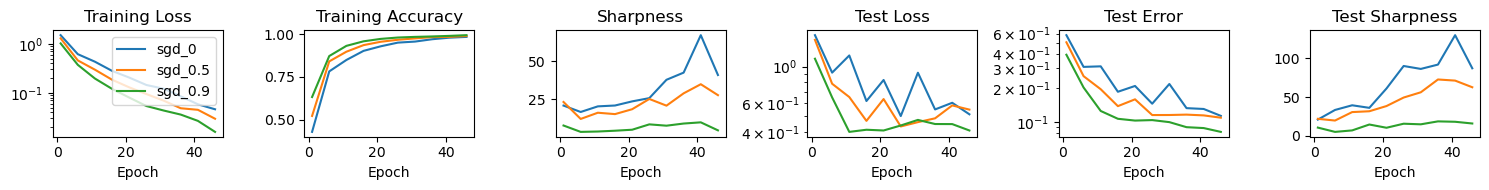

In [36]:
from plot_functions import plot_figures_opts_attrs
from main import graphs

lr, dataset_name, loss_name, momentum, weight_decay, batch_size, width_factor, epochs = 0.1, "cifar", 'CrossEntropyLoss', 0.9, 0, 256, 8, 50
model_name = "WideResNet"
model_params = {}
model_params["sgd_0"] = {"width": width_factor}
model_params["sgd_0.5"] = {"width": width_factor}
model_params["sgd_0.9"] = {"width": width_factor}

opt_params = {}
opt_params['sgd_0'] = {"adv_eta":0.01, 'lr': lr, 'dataset_name':dataset_name, 'loss': loss_name, 'opt':'sgd', 'model_name':model_name, 'momentum':0.0, 'weight_decay':weight_decay, 'batch_size':batch_size, 'epochs':epochs}
opt_params['sgd_0.5'] = {"adv_eta":0.01, 'lr': lr, 'dataset_name':dataset_name, 'loss': loss_name, 'opt':'sgd', 'model_name':model_name, 'momentum':0.5, 'weight_decay':weight_decay, 'batch_size':batch_size, 'epochs':epochs}
opt_params['sgd_0.9'] = {"adv_eta":0.01, 'lr': lr, 'dataset_name':dataset_name, 'loss': loss_name, 'opt':'sgd', 'model_name':model_name, 'momentum':0.9, 'weight_decay':weight_decay, 'batch_size':batch_size, 'epochs':epochs}

plot_figures_opts_attrs(["sgd_0", "sgd_0.5", "sgd_0.9"], model_params, opt_params, attrs=["loss", "acc", "test_loss", "test_err", "eigs", "test_eigs"])

In [ ]:
! python main.py --dataset cifar --model WideResNet --loss CrossEntropyLoss --opt sam --lr 0.01 --epoch 200 --analysis loss eigs adv_eigs --log_interval 10 --batch_size 512 --sam_rho 0.05 --momentum 0.9 --adv_eta 0.01

results/cifar/CrossEntropyLoss/norm-sgd/WideResNet/width_8/base_opt_adam/norm_lr_0.01/lr_0.01/moment_0.9/wd_0/batch_size_512/epoch_200/run_0/
results/cifar/CrossEntropyLoss/adam/WideResNet/width_8/lr_0.01/moment_0.9/wd_0/batch_size_512/epoch_200/run_0/
results/cifar/CrossEntropyLoss/sam/WideResNet/width_8/base_opt_adam/sam_rho_0.5/lr_0.01/moment_0.9/wd_0/batch_size_512/epoch_200/run_0/


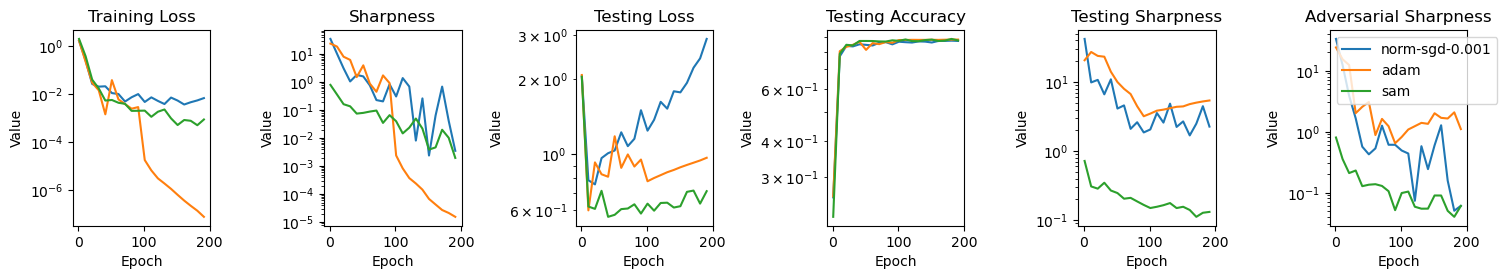

In [22]:
from plot_functions import plot_figures_opts
from main import graphs

lr, dataset_name, loss_name, momentum, weight_decay, batch_size, width_factor, epochs = 0.01, "cifar", 'CrossEntropyLoss', 0.9, 0, 512, 8, 200
model_name = "WideResNet"
model_params = {}
#model_params["sam"] = {"feat_dim":50, "train_size": train_size, "sam_rho":0.2}
model_params["sam"] = {"width":width_factor, "base_opt": "adam","sam_rho":0.5}
#model_params["sam"] = {"base_opt": "adam","sam_rho":2.0, "sam": "adaptive"}
model_params["adam"] = {"width":width_factor}
model_params["norm-sgd-0.001"] = {"width":width_factor,"base_opt": "adam", "norm_lr": 0.01}
model_params["adahessian"] = {"width":width_factor}
#model_params["norm-sgd-0.1"] = {"norm_lr": 0.05, "feat_dim":30, "train_size": train_size}

opt_params = {}
opt_params['sam'] = {"adv_eta":0.01, 'lr': lr, 'dataset_name':dataset_name, 'loss': loss_name, 'opt':'sam', 'model_name':model_name, 'momentum':momentum, 'weight_decay':weight_decay, 'batch_size':batch_size, 'epochs':epochs}
opt_params['adam'] = {"adv_eta":0.01, 'lr': lr, 'dataset_name':dataset_name, 'loss': loss_name, 'opt':'adam', 'model_name':model_name, 'momentum':momentum, 'weight_decay':weight_decay, 'batch_size':batch_size, 'epochs':epochs}
opt_params['norm-sgd-0.001'] = {"adv_eta":0.01, 'lr': lr, 'dataset_name':dataset_name, 'loss': loss_name, 'opt':'norm-sgd', 'model_name':model_name, 'momentum':momentum, 'weight_decay':weight_decay, 'batch_size':batch_size, 'epochs':epochs}
opt_params['norm-sgd-0.1'] = {"adv_eta":0.01, 'lr': lr, 'dataset_name':dataset_name, 'loss': loss_name, 'opt':'norm-sgd', 'model_name':model_name, 'momentum':momentum, 'weight_decay':weight_decay, 'batch_size':batch_size, 'epochs':epochs}
opt_params['adahessian'] = {"adv_eta":0.01, 'lr': lr, 'dataset_name':dataset_name, 'loss': loss_name, 'opt':'adahessian', 'model_name':model_name, 'momentum':momentum, 'weight_decay':5e-4, 'batch_size':128, 'epochs':epochs}

plot_figures_opts(["norm-sgd-0.001", "adam", "sam"], model_params, opt_params)
#plot_figures_opts(["adahessian"], model_params, opt_params)

results/cifar/CrossEntropyLoss/sgd/WideResNet/width_8/lr_0.3/moment_0.9/wd_0/batch_size_128/epoch_200/run_0/


FileNotFoundError: [Errno 2] No such file or directory: '../results/cifar/CrossEntropyLoss/sgd/WideResNet/width_8/lr_0.3/moment_0.9/wd_0/batch_size_128/epoch_200/run_0/train_graphs.pk'

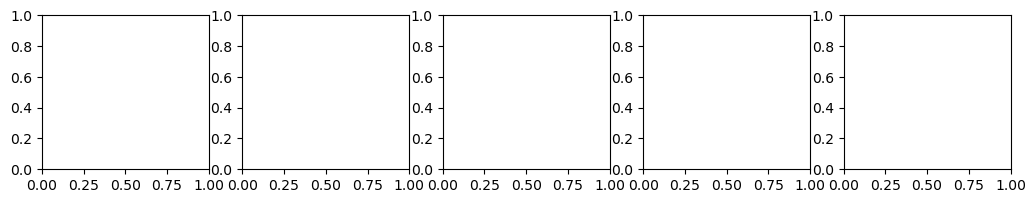

In [14]:
from plot_functions import plot_figures_opts, plot_figures_opts_attrs
from main import graphs

lr, dataset_name, loss_name, momentum, weight_decay, batch_size, width_factor, epochs = 0.01, "cifar", 'CrossEntropyLoss', 0.9, 0, 128, 8, 200
model_name = "WideResNet"
model_params = {}
model_params["sgd_0.1"] = {"width":width_factor}
model_params["sgd_0.01"] = {"width":width_factor}

opt_params = {}
opt_params['sgd_0.1'] = {"adv_eta":0.01, 'lr': 0.3, 'dataset_name':dataset_name, 'loss': loss_name, 'opt':'sgd', 'model_name':model_name, 'momentum':momentum, 'weight_decay':weight_decay, 'batch_size':batch_size, 'epochs':epochs}
opt_params['sgd_0.01'] = {"adv_eta":0.01, 'lr': 0.01, 'dataset_name':dataset_name, 'loss': loss_name, 'opt':'sgd', 'model_name':model_name, 'momentum':momentum, 'weight_decay':weight_decay, 'batch_size':batch_size, 'epochs':epochs}

#plot_figures_opts(["sgd_0.1", "sgd_0.01"], model_params, opt_params)
plot_figures_opts_attrs(["sgd_0.1", "sgd_0.01"], model_params, opt_params, attrs=["loss", "acc", "test_loss", "test_err", "eigs"])

results/cifar/CrossEntropyLoss/sgd/WideResNet/width_8/lr_0.3/moment_0.9/wd_0/batch_size_512/epoch_200/run_0/
results/cifar/CrossEntropyLoss/sgd/WideResNet/width_8/lr_0.01/moment_0.9/wd_0/batch_size_512/epoch_200/run_0/


ValueError: x and y must have same first dimension, but have shapes (20,) and (0,)

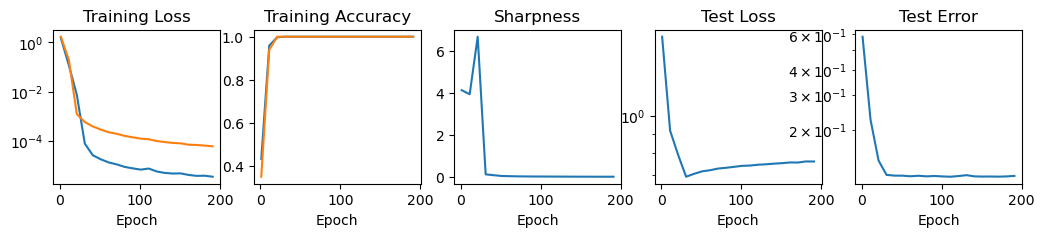

In [15]:
from plot_functions import plot_figures_opts, plot_figures_opts_attrs
from main import graphs

lr, dataset_name, loss_name, momentum, weight_decay, batch_size, width_factor, epochs = 0.01, "cifar", 'CrossEntropyLoss', 0.9, 0, 512, 8, 200
model_name = "WideResNet"
model_params = {}
model_params["sgd_0.1"] = {"width":width_factor}
model_params["sgd_0.01"] = {"width":width_factor}

opt_params = {}
opt_params['sgd_0.1'] = {"adv_eta":0.01, 'lr': 0.3, 'dataset_name':dataset_name, 'loss': loss_name, 'opt':'sgd', 'model_name':model_name, 'momentum':momentum, 'weight_decay':weight_decay, 'batch_size':batch_size, 'epochs':epochs}
opt_params['sgd_0.01'] = {"adv_eta":0.01, 'lr': 0.01, 'dataset_name':dataset_name, 'loss': loss_name, 'opt':'sgd', 'model_name':model_name, 'momentum':momentum, 'weight_decay':weight_decay, 'batch_size':batch_size, 'epochs':epochs}

#plot_figures_opts(["sgd_0.1", "sgd_0.01"], model_params, opt_params)
plot_figures_opts_attrs(["sgd_0.1", "sgd_0.01"], model_params, opt_params, attrs=["loss", "acc", "test_loss", "test_err", "eigs"])

In [ ]:
from plot_functions import plot_figures_opts
from main import graphs

lr, dataset_name, loss_name, momentum, weight_decay, batch_size, epochs = 0.01, "cifar", 'CrossEntropyLoss', 0.9, 0, 512, 200
model_name = "WideResNet"
model_params = {}
#model_params["sam"] = {"feat_dim":50, "train_size": train_size, "sam_rho":0.2}
model_params["sam"] = {"base_opt": "sgd","sam_rho":0.05}
model_params["sgd"] = {}
model_params["norm-sgd-0.001"] = {"base_opt": "sgd", "norm_lr": 0.001}
#model_params["norm-sgd-0.1"] = {"norm_lr": 0.05, "feat_dim":30, "train_size": train_size}

opt_params = {}
opt_params['sam'] = {"adv_eta":0.01, 'lr': lr, 'dataset_name':dataset_name, 'loss': loss_name, 'opt':'sam', 'model_name':model_name, 'momentum':momentum, 'weight_decay':weight_decay, 'batch_size':batch_size, 'epochs':epochs}
opt_params['sgd'] = {"adv_eta":0.01, 'lr': lr, 'dataset_name':dataset_name, 'loss': loss_name, 'opt':'sgd', 'model_name':model_name, 'momentum':momentum, 'weight_decay':weight_decay, 'batch_size':batch_size, 'epochs':epochs}
opt_params['norm-sgd-0.001'] = {"adv_eta":0.01, 'lr': lr, 'dataset_name':dataset_name, 'loss': loss_name, 'opt':'norm-sgd', 'model_name':model_name, 'momentum':momentum, 'weight_decay':weight_decay, 'batch_size':batch_size, 'epochs':epochs}
opt_params['norm-sgd-0.1'] = {"adv_eta":0.01, 'lr': lr, 'dataset_name':dataset_name, 'loss': loss_name, 'opt':'norm-sgd', 'model_name':model_name, 'momentum':momentum, 'weight_decay':weight_decay, 'batch_size':batch_size, 'epochs':epochs}

plot_figures_opts(["norm-sgd-0.001", "sgd", "sam"], model_params, opt_params)

In [ ]:
! python main.py --dataset cifar --model WideResNet --loss CrossEntropyLoss --opt look_sam_v2 --lr 0.01 --epoch 200 --analysis loss --log_interval 10 --batch_size 512 --momentum 0.9 --width_factor 8 --adv_eta 0.01 --sam_rho 0.05 --look_alpha 0.7

In [ ]:
from plot_functions import plot_figures_opts_attrs
from main import graphs

lr, dataset_name, loss_name, momentum, weight_decay, batch_size, width, epochs = 0.01, "cifar", 'CrossEntropyLoss', 0.9, 0, 512, 8, 200
model_name = "WideResNet"
model_params = {}
#model_params["sam"] = {"feat_dim":50, "train_size": train_size, "sam_rho":0.2}
model_params["sam"] = {"width": width, "base_opt": "sgd","sam_rho":0.05}
model_params["sgd"] = {"width": width}
model_params["look_sam_v2"] = {"width": width, "base_opt": "sgd","sam_rho":0.05, "look_alpha": 0.2}
model_params["look_sam"] = {"width": width, "base_opt": "sgd","sam_rho":0.05}
model_params["norm-sgd-0.001"] = {"base_opt": "sgd", "norm_lr": 0.001}
#model_params["norm-sgd-0.1"] = {"norm_lr": 0.05, "feat_dim":30, "train_size": train_size}

opt_params = {}
opt_params['sam'] = {"adv_eta":0.01, 'lr': lr, 'dataset_name':dataset_name, 'loss': loss_name, 'opt':'sam', 'model_name':model_name, 'momentum':momentum, 'weight_decay':weight_decay, 'batch_size':batch_size, 'epochs':epochs}
opt_params['sgd'] = {"adv_eta":0.01, 'lr': lr, 'dataset_name':dataset_name, 'loss': loss_name, 'opt':'sgd', 'model_name':model_name, 'momentum':momentum, 'weight_decay':weight_decay, 'batch_size':batch_size, 'epochs':epochs}
opt_params['look_sam_v2'] = {"adv_eta":0.01, 'lr': lr, 'dataset_name':dataset_name, 'loss': loss_name, 'opt':'look_sam_v2', 'model_name':model_name, 'momentum':momentum, 'weight_decay':weight_decay, 'batch_size':batch_size, 'epochs':epochs}
opt_params['look_sam'] = {"adv_eta":0.01, 'lr': lr, 'dataset_name':dataset_name, 'loss': loss_name, 'opt':'look_sam', 'model_name':model_name, 'momentum':momentum, 'weight_decay':weight_decay, 'batch_size':batch_size, 'epochs':epochs}


plot_figures_opts_attrs(['sam', 'look_sam_v2', 'look_sam'], model_params, opt_params, attrs=["loss", "test_loss"])

In [ ]:
from plot_functions import plot_figures_opts
from main import graphs

lr, dataset_name, loss_name, momentum, weight_decay, batch_size, epochs = 0.01, "cifar", 'CrossEntropyLoss', 0.9, 0, 512, 200
model_name = "WideResNet"
model_params = {}
#model_params["sam"] = {"feat_dim":50, "train_size": train_size, "sam_rho":0.2}
model_params["sam"] = {"sam_rho":0.05}
model_params["sgd"] = {}
model_params["norm-sgd-0.001"] = {"norm_lr": 0.001}
#model_params["norm-sgd-0.1"] = {"norm_lr": 0.05, "feat_dim":30, "train_size": train_size}

opt_params = {}
opt_params['sam'] = {"adv_eta":0.01, 'lr': lr, 'dataset_name':dataset_name, 'loss': loss_name, 'opt':'sam', 'model_name':model_name, 'momentum':momentum, 'weight_decay':weight_decay, 'batch_size':batch_size, 'epochs':epochs}
opt_params['sgd'] = {"adv_eta":0.01, 'lr': lr, 'dataset_name':dataset_name, 'loss': loss_name, 'opt':'sgd', 'model_name':model_name, 'momentum':momentum, 'weight_decay':weight_decay, 'batch_size':batch_size, 'epochs':epochs}
opt_params['norm-sgd-0.001'] = {"adv_eta":0.01, 'lr': lr, 'dataset_name':dataset_name, 'loss': loss_name, 'opt':'norm-sgd', 'model_name':model_name, 'momentum':momentum, 'weight_decay':weight_decay, 'batch_size':batch_size, 'epochs':epochs}
opt_params['norm-sgd-0.1'] = {"adv_eta":0.01, 'lr': lr, 'dataset_name':dataset_name, 'loss': loss_name, 'opt':'norm-sgd', 'model_name':model_name, 'momentum':momentum, 'weight_decay':weight_decay, 'batch_size':batch_size, 'epochs':epochs}

plot_figures_opts(["norm-sgd-0.001", "sgd", "sam"], model_params, opt_params)

In [ ]:
lr, dataset_name, loss_name, opt_name, weight_decay, batch_size, epochs = 0.01, "cifar", "CrossEntropyLoss", "sam", 0, 512, 200
model_name = "WideResNet"
model_params = {}
model_params["sam"] = {"sam_rho":0.05}
model_params["sgd"] = {}
model_params["norm-sgd"] = {"norm_lr": 1e-3}

plot_figures_opts(["sam","sgd", "norm-sgd"], model_params)

In [ ]:
lr, dataset_name, opt_name, weight_decay, batch_size, epochs = 0.001, "cifar", "sam", 0, 512, 200
model_name = "WideResNet"
model_params = {}
model_params["sam"] = {"sam_rho":0.05}
model_params["sgd"] = {}
model_params["norm-sgd"] = {}

plot_figures_opts(["norm-sgd"], model_params)

In [ ]:
import sys
sys.path.append('..')
from main import graphs
import torch
import pickle
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
! python main.py --dataset spurious --model 2-mlp-sim-ln --loss MSELoss --opt sam --lr 0.01 --epoch 4000 --analysis loss eigs --batch_size 64 --sp_train_size 512 --sp_feat_dim 30 --sam_rho 0.2
! python main.py --dataset spurious --model 2-mlp-sim-ln --loss MSELoss --opt norm-sgd --lr 0.01 --epoch 4000 --analysis loss eigs --batch_size 64 --sp_train_size 512 --sp_feat_dim 30 --norm_sgd_lr 0.05

In [ ]:
from plot_functions import plot_figures_opts
from main import graphs

lr, dataset_name, loss_name, opt_name, momentum, weight_decay, batch_size, train_size, epochs = 0.01, "spurious", 'MSELoss', "sam", 0, 0, 64, 512, 4000
model_name = "2-mlp-sim-ln"
model_params = {}
#model_params["sam"] = {"feat_dim":50, "train_size": train_size, "sam_rho":0.2}
model_params["sam"] = {"feat_dim":30, "train_size": train_size, "sam_rho":0.05}
model_params["sgd"] = {"feat_dim":30, "train_size": train_size}
model_params["norm-sgd-0.02"] = {"norm_lr": 0.02, "feat_dim":30, "train_size": train_size}
model_params["norm-sgd-0.1"] = {"norm_lr": 0.05, "feat_dim":30, "train_size": train_size}

opt_params = {}
opt_params['sam'] = {'lr': lr, 'dataset_name':dataset_name, 'loss': loss_name, 'opt':'sam', 'model_name':model_name, 'momentum':momentum, 'weight_decay':weight_decay, 'batch_size':batch_size, 'epochs':epochs}
opt_params['norm-sgd-0.02'] = {'lr': lr, 'dataset_name':dataset_name, 'loss': loss_name, 'opt':'norm-sgd', 'model_name':model_name, 'momentum':momentum, 'weight_decay':weight_decay, 'batch_size':batch_size, 'epochs':epochs}
opt_params['norm-sgd-0.1'] = {'lr': lr, 'dataset_name':dataset_name, 'loss': loss_name, 'opt':'norm-sgd', 'model_name':model_name, 'momentum':momentum, 'weight_decay':weight_decay, 'batch_size':batch_size, 'epochs':epochs}

plot_figures_opts(["norm-sgd-0.02", "norm-sgd-0.1", "sam"], model_params, opt_params)

In [ ]:
! python main.py --dataset spurious-2d --model conv_fixed_last --loss CrossEntropyLoss --opt sam --lr 0.01 --epoch 4000 --analysis loss eigs adv_eigs --batch_size 64 --sp_train_size 512 --sp_feat_dim 30 --width 20 --sam_rho 0.05 --adv_eta 0.01

! python main.py --dataset spurious-2d --model conv_fixed_last --loss CrossEntropyLoss --opt norm-sgd --lr 0.01 --epoch 4000 --analysis loss eigs adv_eigs --batch_size 64 --sp_train_size 512 --sp_feat_dim 30 --width 20 --norm_sgd_lr 0.001 --adv_eta 0.01 --base_opt sgd

In [ ]:
from plot_functions import plot_figures_opts
from main import graphs

lr, dataset_name, loss_name, momentum, weight_decay, batch_size, epochs = 0.01, "spurious-2d", 'CrossEntropyLoss', 0, 0, 64, 4000
model_name = "conv_fixed_last"
model_params = {}
#model_params["sam"] = {"feat_dim":50, "train_size": train_size, "sam_rho":0.2}
model_params["sam"] = {"nfilters":50, "patch_dim":20, "feat_dim":30, "train_size": 128, "base_opt": "sgd", "sam_rho":0.05}
model_params["sgd"] = {"nfilters":50, "patch_dim":20, "feat_dim":30, "train_size": 128,}
model_params["norm-sgd"] = {"nfilters":50, "patch_dim":20, "feat_dim":30, "train_size": 128, "base_opt": "sgd", "norm_lr": 0.0001}
#model_params["norm-sgd-0.1"] = {"norm_lr": 0.05, "feat_dim":30, "train_size": train_size}

opt_params = {}
opt_params['sam'] = {"adv_eta":0.01, 'lr': lr, 'dataset_name':dataset_name, 'loss': loss_name, 'opt':'sam', 'model_name':model_name, 'momentum':momentum, 'weight_decay':weight_decay, 'batch_size':batch_size, 'epochs':epochs}
opt_params['sgd'] = {"adv_eta":0.01, 'lr': lr, 'dataset_name':dataset_name, 'loss': loss_name, 'opt':'sgd', 'model_name':model_name, 'momentum':momentum, 'weight_decay':weight_decay, 'batch_size':batch_size, 'epochs':epochs}
opt_params['norm-sgd'] = {"adv_eta":0.01, 'lr': lr, 'dataset_name':dataset_name, 'loss': loss_name, 'opt':'norm-sgd', 'model_name':model_name, 'momentum':momentum, 'weight_decay':weight_decay, 'batch_size':batch_size, 'epochs':epochs}
opt_params['norm-sgd-0.1'] = {"adv_eta":0.01, 'lr': lr, 'dataset_name':dataset_name, 'loss': loss_name, 'opt':'norm-sgd', 'model_name':model_name, 'momentum':momentum, 'weight_decay':weight_decay, 'batch_size':batch_size, 'epochs':epochs}

plot_figures_opts(["sam", "sgd"], model_params, opt_params)

In [ ]:
! python main.py --dataset spurious-2d --model conv_fixed_last --loss CrossEntropyLoss --opt sam --lr 0.01 --epoch 200 --log_interval 10 --analysis loss eigs adv_eigs --batch_size 20 --sp_train_size 20 --sp_feat_dim 5000 --width 10 --sam_rho 0.05 --adv_eta 0.01

In [ ]:
from plot_functions import plot_figures_opts
from main import graphs

lr, dataset_name, loss_name, momentum, weight_decay, batch_size, epochs = 0.01, "spurious-2d", 'CrossEntropyLoss', 0, 0, 20, 200
model_name = "conv_fixed_last"
model_params = {}
#model_params["sam"] = {"feat_dim":50, "train_size": train_size, "sam_rho":0.2}
model_params["sam"] = {"nfilters":10, "patch_dim":20, "feat_dim":10000, "train_size": 20, "base_opt": "sgd", "sam_rho":0.05}
model_params["sgd"] = {"nfilters":10, "patch_dim":20, "feat_dim":10000, "train_size": 20,}
model_params["norm-sgd"] = {"nfilters":10, "patch_dim":20, "feat_dim":5000, "train_size": 20, "base_opt": "sgd", "norm_lr": 0.0001}
#model_params["norm-sgd-0.1"] = {"norm_lr": 0.05, "feat_dim":30, "train_size": train_size}

opt_params = {}
opt_params['sam'] = {"adv_eta":0.01, 'lr': lr, 'dataset_name':dataset_name, 'loss': loss_name, 'opt':'sam', 'model_name':model_name, 'momentum':momentum, 'weight_decay':weight_decay, 'batch_size':batch_size, 'epochs':epochs}
opt_params['sgd'] = {"adv_eta":0.01, 'lr': lr, 'dataset_name':dataset_name, 'loss': loss_name, 'opt':'sgd', 'model_name':model_name, 'momentum':momentum, 'weight_decay':weight_decay, 'batch_size':batch_size, 'epochs':epochs}
opt_params['norm-sgd'] = {"adv_eta":0.01, 'lr': lr, 'dataset_name':dataset_name, 'loss': loss_name, 'opt':'norm-sgd', 'model_name':model_name, 'momentum':momentum, 'weight_decay':weight_decay, 'batch_size':batch_size, 'epochs':epochs}
opt_params['norm-sgd-0.1'] = {"adv_eta":0.01, 'lr': lr, 'dataset_name':dataset_name, 'loss': loss_name, 'opt':'norm-sgd', 'model_name':model_name, 'momentum':momentum, 'weight_decay':weight_decay, 'batch_size':batch_size, 'epochs':epochs}

plot_figures_opts(["sgd", "sam"], model_params, opt_params)

In [ ]:
! python main.py --dataset spurious-2d --model conv_fixed_last --loss BCELoss --opt sgd --lr 0.01 --epoch 5000 --log_interval 100 --analysis loss eigs adv_eigs --batch_size 50 --sp_train_size 100 --sp_feat_dim 200 --width 10 --adv_eta 0.01 --run_from_scratch 1
! python main.py --dataset spurious-2d --model conv_fixed_last --loss BCELoss --opt norm-sgd --lr 0.01 --epoch 5000 --log_interval 100 --analysis loss eigs adv_eigs --batch_size 50 --sp_train_size 100 --sp_feat_dim 200 --norm_sgd_lr 0.001 --width 10 --adv_eta 0.01 --run_from_scratch 1


In [ ]:
from plot_functions import plot_figures_opts
from main import graphs

lr, dataset_name, loss_name, momentum, weight_decay, batch_size, epochs = 0.01, "spurious-2d", 'BCELoss', 0, 0, 50, 1000
model_name = "conv_fixed_last"
nfilters, patch_dim, feat_dim, train_size = 10, 20, 20, 100
model_params = {}
#model_params["sam"] = {"feat_dim":50, "train_size": train_size, "sam_rho":0.2}
model_params["sam-20"] = {"nfilters":nfilters, "patch_dim":patch_dim, "feat_dim":20, "train_size": train_size, "base_opt": "sgd", "sam_rho":0.03}
model_params["sam-200"] = {"nfilters":nfilters, "patch_dim":patch_dim, "feat_dim":200, "train_size": train_size, "base_opt": "sgd", "sam_rho":0.05}
model_params["sam-2000"] = {"nfilters":nfilters, "patch_dim":patch_dim, "feat_dim":2000, "train_size": train_size, "base_opt": "sgd", "sam_rho":0.01}
model_params["sgd"] = {"nfilters":nfilters, "patch_dim":patch_dim, "feat_dim":200, "train_size": train_size,}
model_params["norm-sgd"] = {"nfilters":nfilters, "patch_dim":patch_dim, "feat_dim":200, "train_size": train_size, "base_opt": "sgd", "norm_lr": 0.001}
#model_params["norm-sgd-0.1"] = {"norm_lr": 0.05, "feat_dim":30, "train_size": train_size}

opt_params = {}
opt_params['sam-20'] = {"adv_eta":0.01, 'lr': lr, 'dataset_name':dataset_name, 'loss': loss_name, 'opt':'sam', 'model_name':model_name, 'momentum':momentum, 'weight_decay':weight_decay, 'batch_size':batch_size, 'epochs':epochs}
opt_params['sam-200'] = {"adv_eta":0.05, 'lr': lr, 'dataset_name':dataset_name, 'loss': loss_name, 'opt':'sam', 'model_name':model_name, 'momentum':momentum, 'weight_decay':weight_decay, 'batch_size':batch_size, 'epochs':5000}
opt_params['sam-2000'] = {"adv_eta":0.01, 'lr': lr, 'dataset_name':dataset_name, 'loss': loss_name, 'opt':'sam', 'model_name':model_name, 'momentum':momentum, 'weight_decay':weight_decay, 'batch_size':batch_size, 'epochs':epochs}
opt_params['sgd'] = {"adv_eta":0.01, 'lr': lr, 'dataset_name':dataset_name, 'loss': loss_name, 'opt':'sgd', 'model_name':model_name, 'momentum':momentum, 'weight_decay':weight_decay, 'batch_size':batch_size, 'epochs':5000}
opt_params['norm-sgd'] = {"adv_eta":0.05, 'lr': lr, 'dataset_name':dataset_name, 'loss': loss_name, 'opt':'norm-sgd', 'model_name':model_name, 'momentum':momentum, 'weight_decay':weight_decay, 'batch_size':batch_size, 'epochs':5000}
opt_params['norm-sgd-0.1'] = {"adv_eta":0.01, 'lr': lr, 'dataset_name':dataset_name, 'loss': loss_name, 'opt':'norm-sgd', 'model_name':model_name, 'momentum':momentum, 'weight_decay':weight_decay, 'batch_size':batch_size, 'epochs':epochs}

plot_figures_opts(["sam-200","norm-sgd"], model_params, opt_params)

In [ ]:
from plot_functions import plot_figures_opts
from main import graphs

lr, dataset_name, loss_name, momentum, weight_decay, batch_size, epochs = 2e-5, "mrpc", 'CrossEntropyLoss', 0, 0.0, 128, 200
model_name = "google-bert/bert-base-cased"
model_params = {}
model_params["sam"] = {"base_opt": "sgd", "sam_rho":0.5}
model_params["sgd"] = {}
#model_params["norm-sgd"] = {"nfilters":nfilters, "patch_dim":patch_dim, "feat_dim":200, "train_size": train_size, "base_opt": "sgd", "norm_lr": 0.001}
#model_params["norm-sgd-0.1"] = {"norm_lr": 0.05, "feat_dim":30, "train_size": train_size}

opt_params = {}
opt_params['sam'] = {'lr': lr, 'dataset_name':dataset_name, 'loss': loss_name, 'opt':'sam', 'model_name':model_name, 'momentum':momentum, 'weight_decay':weight_decay, 'batch_size':batch_size, 'epochs':epochs}
opt_params['sgd'] = {'lr': lr, 'dataset_name':dataset_name, 'loss': loss_name, 'opt':'sgd', 'model_name':model_name, 'momentum':momentum, 'weight_decay':weight_decay, 'batch_size':batch_size, 'epochs':epochs}
#opt_params['norm-sgd'] = {"adv_eta":0.05, 'lr': lr, 'dataset_name':dataset_name, 'loss': loss_name, 'opt':'norm-sgd', 'model_name':model_name, 'momentum':momentum, 'weight_decay':weight_decay, 'batch_size':batch_size, 'epochs':5000}
#opt_params['norm-sgd-0.1'] = {"adv_eta":0.01, 'lr': lr, 'dataset_name':dataset_name, 'loss': loss_name, 'opt':'norm-sgd', 'model_name':model_name, 'momentum':momentum, 'weight_decay':weight_decay, 'batch_size':batch_size, 'epochs':epochs}

plot_figures_opts(["sgd", "sam"], model_params, opt_params)


In [ ]:
! python main.py --dataset multi-view --model conv_fixed_last --loss BCELoss --opt sgd --lr 0.01 --epoch 500 --log_interval 10 --analysis loss eigs --batch_size 50 --sp_train_size 100 --sp_feat_dim 200 --width 10
! python main.py --dataset multi-view --model conv_fixed_last --loss BCELoss --opt sgd --lr 0.01 --epoch 500 --log_interval 10 --analysis loss eigs --batch_size 128 --sp_train_size 512 --sp_feat_dim 200 --width 500 --momentum 0.9

In [ ]:
from plot_functions import plot_figures_opts
from main import graphs

lr, dataset_name, loss_name, momentum, weight_decay, batch_size, epochs = 0.01, "multi-view", 'BCELoss', 0, 0, 128, 2000
model_name = "conv_fixed_last"
nfilters, patch_dim, feat_dim, train_size = 500, 20, 200, 512
model_params = {}
#model_params["sam"] = {"feat_dim":50, "train_size": train_size, "sam_rho":0.2}
model_params["sam-20"] = {"nfilters":nfilters, "patch_dim":patch_dim, "feat_dim":feat_dim, "train_size": train_size, "base_opt": "sgd", "sam_rho":0.5}
model_params["sam-200"] = {"nfilters":nfilters, "patch_dim":patch_dim, "feat_dim":200, "train_size": train_size, "base_opt": "sgd", "sam_rho":0.05}
model_params["sam-2000"] = {"nfilters":nfilters, "patch_dim":patch_dim, "feat_dim":2000, "train_size": train_size, "base_opt": "sgd", "sam_rho":0.01}
model_params["sgd-0.05"] = {"nfilters":nfilters, "patch_dim":patch_dim, "feat_dim":feat_dim, "train_size": train_size,}
model_params["sgd-0.01"] = {"nfilters":nfilters, "patch_dim":patch_dim, "feat_dim":feat_dim, "train_size": train_size,}
#model_params["norm-sgd"] = {"nfilters":nfilters, "patch_dim":patch_dim, "feat_dim":200, "train_size": train_size, "base_opt": "sgd", "norm_lr": 0.001}
#model_params["norm-sgd-0.1"] = {"norm_lr": 0.05, "feat_dim":30, "train_size": train_size}

opt_params = {}
opt_params['sgd-0.05'] = {'lr': 0.5, 'dataset_name':dataset_name, 'loss': loss_name, 'opt':'sgd', 'model_name':model_name, 'momentum':0.9, 'weight_decay':weight_decay, 'batch_size':batch_size, 'epochs':epochs}
opt_params['sgd-0.01'] = {'lr': 0.5, 'dataset_name':dataset_name, 'loss': loss_name, 'opt':'sgd', 'model_name':model_name, 'momentum':0.0, 'weight_decay':weight_decay, 'batch_size':batch_size, 'epochs':epochs}
opt_params['sam-20'] = {'lr': 0.5, 'dataset_name':dataset_name, 'loss': loss_name, 'opt':'sam', 'model_name':model_name, 'momentum':0.0, 'weight_decay':weight_decay, 'batch_size':batch_size, 'epochs':epochs}

#opt_params['norm-sgd'] = {"adv_eta":0.05, 'lr': lr, 'dataset_name':dataset_name, 'loss': loss_name, 'opt':'norm-sgd', 'model_name':model_name, 'momentum':momentum, 'weight_decay':weight_decay, 'batch_size':batch_size, 'epochs':5000}
#opt_params['norm-sgd-0.1'] = {"adv_eta":0.01, 'lr': lr, 'dataset_name':dataset_name, 'loss': loss_name, 'opt':'norm-sgd', 'model_name':model_name, 'momentum':momentum, 'weight_decay':weight_decay, 'batch_size':batch_size, 'epochs':epochs}

plot_figures_opts(['sgd-0.05', "sgd-0.01", "sam-20"], model_params, opt_params)

In [ ]:
from plot_functions import plot_figures_opts
from main import graphs

lr, dataset_name, loss_name, momentum, weight_decay, batch_size, epochs = 0.01, "multi-view", 'BCELoss', 0, 0, 128, 500
model_name = "conv_with_last"
nfilters, patch_dim, feat_dim, train_size = 500, 20, 200, 512
model_params = {}
#model_params["sam"] = {"feat_dim":50, "train_size": train_size, "sam_rho":0.2}
model_params["sam-20"] = {"nfilters":nfilters, "patch_dim":patch_dim, "feat_dim":20, "train_size": train_size, "base_opt": "sgd", "sam_rho":0.03}
model_params["sam-200"] = {"nfilters":nfilters, "patch_dim":patch_dim, "feat_dim":200, "train_size": train_size, "base_opt": "sgd", "sam_rho":0.05}
model_params["sam-2000"] = {"nfilters":nfilters, "patch_dim":patch_dim, "feat_dim":2000, "train_size": train_size, "base_opt": "sgd", "sam_rho":0.01}
model_params["sgd-0.05"] = {"nfilters":nfilters, "patch_dim":patch_dim, "feat_dim":feat_dim, "train_size": train_size,}
model_params["sgd-0.01"] = {"nfilters":nfilters, "patch_dim":patch_dim, "feat_dim":feat_dim, "train_size": train_size,}
#model_params["norm-sgd"] = {"nfilters":nfilters, "patch_dim":patch_dim, "feat_dim":200, "train_size": train_size, "base_opt": "sgd", "norm_lr": 0.001}
#model_params["norm-sgd-0.1"] = {"norm_lr": 0.05, "feat_dim":30, "train_size": train_size}

opt_params = {}
opt_params['sgd-0.05'] = {'lr': 0.1, 'dataset_name':dataset_name, 'loss': loss_name, 'opt':'sgd', 'model_name':model_name, 'momentum':momentum, 'weight_decay':weight_decay, 'batch_size':batch_size, 'epochs':epochs}
opt_params['sgd-0.01'] = {'lr': 0.01, 'dataset_name':dataset_name, 'loss': loss_name, 'opt':'sgd', 'model_name':model_name, 'momentum':momentum, 'weight_decay':weight_decay, 'batch_size':batch_size, 'epochs':epochs}
#opt_params['norm-sgd'] = {"adv_eta":0.05, 'lr': lr, 'dataset_name':dataset_name, 'loss': loss_name, 'opt':'norm-sgd', 'model_name':model_name, 'momentum':momentum, 'weight_decay':weight_decay, 'batch_size':batch_size, 'epochs':5000}
#opt_params['norm-sgd-0.1'] = {"adv_eta":0.01, 'lr': lr, 'dataset_name':dataset_name, 'loss': loss_name, 'opt':'norm-sgd', 'model_name':model_name, 'momentum':momentum, 'weight_decay':weight_decay, 'batch_size':batch_size, 'epochs':epochs}

plot_figures_opts(['sgd-0.05', "sgd-0.01"], model_params, opt_params)

In [ ]:
from plot_functions import plot_figures_opts
from main import graphs

lr, dataset_name, loss_name, momentum, weight_decay, batch_size, epochs = 0.01, "multi-view", 'MSELoss', 0, 0, 512, 500
model_name = "conv_fixed_last"
nfilters, patch_dim, feat_dim, train_size = 500, 20, 200, 512
model_params = {}
#model_params["sam"] = {"feat_dim":50, "train_size": train_size, "sam_rho":0.2}
model_params["sam-20"] = {"nfilters":nfilters, "patch_dim":patch_dim, "feat_dim":20, "train_size": train_size, "base_opt": "sgd", "sam_rho":0.03}
model_params["sam-200"] = {"nfilters":nfilters, "patch_dim":patch_dim, "feat_dim":200, "train_size": train_size, "base_opt": "sgd", "sam_rho":0.05}
model_params["sam-2000"] = {"nfilters":nfilters, "patch_dim":patch_dim, "feat_dim":2000, "train_size": train_size, "base_opt": "sgd", "sam_rho":0.01}
model_params["sgd-0.05"] = {"nfilters":nfilters, "patch_dim":patch_dim, "feat_dim":feat_dim, "train_size": train_size,}
model_params["sgd-0.01"] = {"nfilters":nfilters, "patch_dim":patch_dim, "feat_dim":feat_dim, "train_size": train_size,}
#model_params["norm-sgd"] = {"nfilters":nfilters, "patch_dim":patch_dim, "feat_dim":200, "train_size": train_size, "base_opt": "sgd", "norm_lr": 0.001}
#model_params["norm-sgd-0.1"] = {"norm_lr": 0.05, "feat_dim":30, "train_size": train_size}

opt_params = {}
opt_params['sgd-0.05'] = {'lr': 0.08, 'dataset_name':dataset_name, 'loss': loss_name, 'opt':'sgd', 'model_name':model_name, 'momentum':momentum, 'weight_decay':weight_decay, 'batch_size':batch_size, 'epochs':epochs}
opt_params['sgd-0.01'] = {'lr': 0.1, 'dataset_name':dataset_name, 'loss': loss_name, 'opt':'sgd', 'model_name':model_name, 'momentum':momentum, 'weight_decay':weight_decay, 'batch_size':batch_size, 'epochs':epochs}
#opt_params['norm-sgd'] = {"adv_eta":0.05, 'lr': lr, 'dataset_name':dataset_name, 'loss': loss_name, 'opt':'norm-sgd', 'model_name':model_name, 'momentum':momentum, 'weight_decay':weight_decay, 'batch_size':batch_size, 'epochs':5000}
#opt_params['norm-sgd-0.1'] = {"adv_eta":0.01, 'lr': lr, 'dataset_name':dataset_name, 'loss': loss_name, 'opt':'norm-sgd', 'model_name':model_name, 'momentum':momentum, 'weight_decay':weight_decay, 'batch_size':batch_size, 'epochs':epochs}

plot_figures_opts(['sgd-0.05', "sgd-0.01"], model_params, opt_params)

In [ ]:
from plot_functions import plot_figures_opts
from main import graphs

lr, dataset_name, loss_name, momentum, weight_decay, batch_size, epochs = 0.01, "multi-view", 'MSELoss', 0, 0, 512, 8000
model_name = "conv_fixed_last"
nfilters, patch_dim, feat_dim, train_size = 500, 20, 200, 512
model_params = {}
#model_params["sam"] = {"feat_dim":50, "train_size": train_size, "sam_rho":0.2}
model_params["sam-20"] = {"nfilters":nfilters, "patch_dim":patch_dim, "feat_dim":20, "train_size": train_size, "base_opt": "sgd", "sam_rho":0.03}
model_params["sam-200"] = {"nfilters":nfilters, "patch_dim":patch_dim, "feat_dim":200, "train_size": train_size, "base_opt": "sgd", "sam_rho":0.05}
model_params["sam-2000"] = {"nfilters":nfilters, "patch_dim":patch_dim, "feat_dim":2000, "train_size": train_size, "base_opt": "sgd", "sam_rho":0.01}
model_params["sgd-0.05"] = {"nfilters":nfilters, "patch_dim":patch_dim, "feat_dim":feat_dim, "train_size": train_size,}
model_params["sgd-0.01"] = {"nfilters":nfilters, "patch_dim":patch_dim, "feat_dim":feat_dim, "train_size": train_size,}
#model_params["norm-sgd"] = {"nfilters":nfilters, "patch_dim":patch_dim, "feat_dim":200, "train_size": train_size, "base_opt": "sgd", "norm_lr": 0.001}
#model_params["norm-sgd-0.1"] = {"norm_lr": 0.05, "feat_dim":30, "train_size": train_size}

opt_params = {}
opt_params['sgd-0.05'] = {'lr': 0.05, 'dataset_name':dataset_name, 'loss': loss_name, 'opt':'sgd', 'model_name':model_name, 'momentum':momentum, 'weight_decay':weight_decay, 'batch_size':batch_size, 'epochs':epochs}
opt_params['sgd-0.01'] = {'lr': 0.1, 'dataset_name':dataset_name, 'loss': loss_name, 'opt':'sgd', 'model_name':model_name, 'momentum':momentum, 'weight_decay':weight_decay, 'batch_size':batch_size, 'epochs':epochs}
#opt_params['norm-sgd'] = {"adv_eta":0.05, 'lr': lr, 'dataset_name':dataset_name, 'loss': loss_name, 'opt':'norm-sgd', 'model_name':model_name, 'momentum':momentum, 'weight_decay':weight_decay, 'batch_size':batch_size, 'epochs':5000}
#opt_params['norm-sgd-0.1'] = {"adv_eta":0.01, 'lr': lr, 'dataset_name':dataset_name, 'loss': loss_name, 'opt':'norm-sgd', 'model_name':model_name, 'momentum':momentum, 'weight_decay':weight_decay, 'batch_size':batch_size, 'epochs':epochs}

plot_figures_opts(['sgd-0.05', "sgd-0.01"], model_params, opt_params)

In [ ]:
! python main.py --dataset multi-view --model conv_with_last --loss MSELoss --opt sgd --lr 0.012 --epoch 8000 --log_interval 50 --analysis loss eigs align --batch_size 512 --sp_train_size 512 --sp_feat_dim 200 --width 500

In [ ]:
from plot_functions import plot_figures_opts
from main import graphs

lr, dataset_name, loss_name, momentum, weight_decay, batch_size, epochs = 0.01, "multi-view", 'MSELoss', 0, 0, 512, 8000
model_name = "conv_with_last"
nfilters, patch_dim, feat_dim, train_size = 500, 20, 200, 512
model_params = {}
#model_params["sam"] = {"feat_dim":50, "train_size": train_size, "sam_rho":0.2}
model_params["sam-20"] = {"nfilters":nfilters, "patch_dim":patch_dim, "feat_dim":20, "train_size": train_size, "base_opt": "sgd", "sam_rho":0.03}
model_params["sam-200"] = {"nfilters":nfilters, "patch_dim":patch_dim, "feat_dim":200, "train_size": train_size, "base_opt": "sgd", "sam_rho":0.05}
model_params["sam-2000"] = {"nfilters":nfilters, "patch_dim":patch_dim, "feat_dim":2000, "train_size": train_size, "base_opt": "sgd", "sam_rho":0.01}
model_params["sgd-0.05"] = {"nfilters":nfilters, "patch_dim":patch_dim, "feat_dim":feat_dim, "train_size": train_size,}
model_params["sgd-0.01"] = {"nfilters":nfilters, "patch_dim":patch_dim, "feat_dim":feat_dim, "train_size": train_size,}
#model_params["norm-sgd"] = {"nfilters":nfilters, "patch_dim":patch_dim, "feat_dim":200, "train_size": train_size, "base_opt": "sgd", "norm_lr": 0.001}
#model_params["norm-sgd-0.1"] = {"norm_lr": 0.05, "feat_dim":30, "train_size": train_size}

opt_params = {}
opt_params['sgd-0.05'] = {'lr': 0.012, 'dataset_name':dataset_name, 'loss': loss_name, 'opt':'sgd', 'model_name':model_name, 'momentum':momentum, 'weight_decay':weight_decay, 'batch_size':batch_size, 'epochs':epochs}
opt_params['sgd-0.01'] = {'lr': 0.01, 'dataset_name':dataset_name, 'loss': loss_name, 'opt':'sgd', 'model_name':model_name, 'momentum':momentum, 'weight_decay':weight_decay, 'batch_size':batch_size, 'epochs':epochs}
#opt_params['norm-sgd'] = {"adv_eta":0.05, 'lr': lr, 'dataset_name':dataset_name, 'loss': loss_name, 'opt':'norm-sgd', 'model_name':model_name, 'momentum':momentum, 'weight_decay':weight_decay, 'batch_size':batch_size, 'epochs':5000}
#opt_params['norm-sgd-0.1'] = {"adv_eta":0.01, 'lr': lr, 'dataset_name':dataset_name, 'loss': loss_name, 'opt':'norm-sgd', 'model_name':model_name, 'momentum':momentum, 'weight_decay':weight_decay, 'batch_size':batch_size, 'epochs':epochs}

plot_figures_opts(["sgd-0.01", 'sgd-0.05'], model_params, opt_params)

In [ ]:
from plot_functions import get_attr, plot_max_2d
align = get_attr('sgd-0.01', model_params, opt_params, "align")
plot_max_2d(align, 5)

In [ ]:
out_layer = get_attr('sgd-0.05', model_params, opt_params, "out_layer")
plot_max_2d(out_layer, 2)

In [ ]:
from plot_functions import get_attr, plot_max_2d
align = get_attr('sgd-0.05', model_params, opt_params, "align")
plot_max_2d(align, 20)

In [ ]:
import numpy as np
plt.plot([np.max(align[i]) for i in range(len(align))])
print([np.argmax(align[i]) for i in range(len(align))])

plt.plot([np.partition(align[i].flatten(), -2)[-2] for i in range(len(align))])
plt.plot([np.partition(align[i].flatten(), -3)[-3] for i in range(len(align))])
plt.plot([np.partition(align[i].flatten(), -4)[-4] for i in range(len(align))])
plt.plot([np.partition(align[i].flatten(), -5)[-5] for i in range(len(align))])

In [ ]:
import numpy as np
plt.plot([np.min(align[i]) for i in range(len(align))])
print([np.argmin(align[i]) for i in range(len(align))])

In [ ]:
import matplotlib.pyplot as plt
plt.hist(align[100])

In [ ]:
plt.hist(align[0])

In [ ]:
len(align)

### ViT

In [ ]:
! python main.py --dataset cifar --model ViT --loss CrossEntropyLoss --opt sam --lr 3e-3 --epoch 20 --analysis loss --log_interval 2 --batch_size 128 --momentum 0.9 --width 1024 --adv_eta 0.01 --sam_rho 0.01
! python main.py --dataset cifar --model ViT --loss CrossEntropyLoss --opt sgd --lr 3e-3 --epoch 60 --analysis loss --log_interval 2 --batch_size 128 --momentum 0.0 --width 1024 --adv_eta 0.01

In [ ]:
from plot_functions import plot_figures_opts_attrs
from main import graphs

lr, dataset_name, loss_name, momentum, weight_decay, batch_size, width, epochs = 3e-3, "cifar", 'CrossEntropyLoss', 0.9, 0, 128, 1024, 20
model_name = "ViT"
model_params = {}
#model_params["sam"] = {"feat_dim":50, "train_size": train_size, "sam_rho":0.2}
model_params["sam"] = {"width": width, "base_opt": "sgd","sam_rho":0.1}
#model_params["sam"] = {"base_opt": "adam","sam_rho":2.0, "sam": "adaptive"}
model_params["sgd"] = {"width": width}
#model_params["norm-sgd-0.001"] = {'width':width_factor, "base_opt": "sgd", "norm_lr": 0.001}
#model_params["norm-sgd-0.1"] = {"norm_lr": 0.05, "feat_dim":30, "train_size": train_size}

opt_params = {}
opt_params['sam'] = {"adv_eta":0.01, 'lr': lr, 'dataset_name':dataset_name, 'loss': loss_name, 'opt':'sam', 'model_name':model_name, 'momentum':momentum, 'weight_decay':weight_decay, 'batch_size':batch_size, 'epochs':40}
opt_params['sgd'] = {"adv_eta":0.01, 'lr': lr, 'dataset_name':dataset_name, 'loss': loss_name, 'opt':'sgd', 'model_name':model_name, 'momentum':momentum, 'weight_decay':weight_decay, 'batch_size':batch_size, 'epochs':epochs}
opt_params['norm-sgd-0.001'] = {"adv_eta":0.01, 'lr': lr, 'dataset_name':dataset_name, 'loss': loss_name, 'opt':'norm-sgd', 'model_name':model_name, 'momentum':momentum, 'weight_decay':weight_decay, 'batch_size':batch_size, 'epochs':epochs}
opt_params['norm-sgd-0.1'] = {"adv_eta":0.01, 'lr': lr, 'dataset_name':dataset_name, 'loss': loss_name, 'opt':'norm-sgd', 'model_name':model_name, 'momentum':momentum, 'weight_decay':weight_decay, 'batch_size':batch_size, 'epochs':epochs}

#plot_figures_opts(["sgd", "sam"], model_params, opt_params)
plot_figures_opts_attrs(['sgd', 'sam'], model_params, opt_params, attrs=["loss", "test_loss"])

In [ ]:
from plot_functions import plot_figures_opts_attrs
from main import graphs

lr, dataset_name, loss_name, momentum, weight_decay, batch_size, width, epochs = 3e-3, "cifar", 'CrossEntropyLoss', 0.0, 0, 128, 1024, 60
model_name = "ViT"
model_params = {}
#model_params["sam"] = {"feat_dim":50, "train_size": train_size, "sam_rho":0.2}
model_params["sam"] = {"width": width, "base_opt": "sgd","sam_rho":0.02}
model_params["look_sam"] = {"width": width, "base_opt": "sgd","sam_rho":0.02, "look_alpha":0.2}
model_params["look_sam_v2"] = {"width": width, "base_opt": "sgd","sam_rho":0.02, "look_alpha":0.2}
model_params["replay_sam"] = {"width": width, "base_opt": "sgd","sam_rho":0.02}
#model_params["sam"] = {"base_opt": "adam","sam_rho":2.0, "sam": "adaptive"}
model_params["sgd"] = {"width": width}
#model_params["norm-sgd-0.001"] = {'width':width_factor, "base_opt": "sgd", "norm_lr": 0.001}
#model_params["norm-sgd-0.1"] = {"norm_lr": 0.05, "feat_dim":30, "train_size": train_size}

opt_params = {}
opt_params['sam'] = {"adv_eta":0.01, 'lr': lr, 'dataset_name':dataset_name, 'loss': loss_name, 'opt':'sam', 'model_name':model_name, 'momentum':momentum, 'weight_decay':weight_decay, 'batch_size':batch_size, 'epochs':epochs}
opt_params['sgd'] = {"adv_eta":0.01, 'lr': lr, 'dataset_name':dataset_name, 'loss': loss_name, 'opt':'sgd', 'model_name':model_name, 'momentum':momentum, 'weight_decay':weight_decay, 'batch_size':batch_size, 'epochs':epochs}
opt_params['look_sam'] = {"adv_eta":0.01, 'lr': lr, 'dataset_name':dataset_name, 'loss': loss_name, 'opt':'look_sam', 'model_name':model_name, 'momentum':momentum, 'weight_decay':weight_decay, 'batch_size':batch_size, 'epochs':epochs}
#opt_params['norm-sgd-0.1'] = {"adv_eta":0.01, 'lr': lr, 'dataset_name':dataset_name, 'loss': loss_name, 'opt':'norm-sgd', 'model_name':model_name, 'momentum':momentum, 'weight_decay':weight_decay, 'batch_size':batch_size, 'epochs':epochs}
opt_params['replay_sam'] = {"adv_eta":0.01, 'lr': lr, 'dataset_name':dataset_name, 'loss': loss_name, 'opt':'replay_sam', 'model_name':model_name, 'momentum':momentum, 'weight_decay':weight_decay, 'batch_size':batch_size, 'epochs':epochs}
opt_params['look_sam_v2'] = {"adv_eta":0.01, 'lr': lr, 'dataset_name':dataset_name, 'loss': loss_name, 'opt':'look_sam_v2', 'model_name':model_name, 'momentum':momentum, 'weight_decay':weight_decay, 'batch_size':batch_size, 'epochs':epochs}

#plot_figures_opts(["sgd", "sam"], model_params, opt_params)
plot_figures_opts_attrs(['sgd', 'sam', 'look_sam', 'look_sam_v2', 'replay_sam'], model_params, opt_params, attrs=["loss", "test_loss"])

In [ ]:
from plot_functions import plot_figures_opts_attrs
from main import graphs

lr, dataset_name, loss_name, momentum, weight_decay, batch_size, width, epochs = 0.01, "cifar", 'CrossEntropyLoss', 0.9, 0, 512, 8, 200
model_name = "WideResNet"
model_params = {}
#model_params["sam"] = {"feat_dim":50, "train_size": train_size, "sam_rho":0.2}
model_params["sam"] = {"width": width, "base_opt": "sgd","sam_rho":0.05}
model_params["sgd"] = {"width": width}
model_params["look_sam_v2"] = {"width": width, "base_opt": "sgd","sam_rho":0.05, "look_alpha": 0.2}
model_params["look_sam"] = {"width": width, "base_opt": "sgd","sam_rho":0.05}
model_params["replay_sam"] = {"width": width, "base_opt": "sgd","sam_rho":0.05}
#model_params["norm-sgd-0.1"] = {"norm_lr": 0.05, "feat_dim":30, "train_size": train_size}

opt_params = {}
opt_params['sam'] = {"adv_eta":0.01, 'lr': lr, 'dataset_name':dataset_name, 'loss': loss_name, 'opt':'sam', 'model_name':model_name, 'momentum':momentum, 'weight_decay':weight_decay, 'batch_size':batch_size, 'epochs':epochs}
opt_params['sgd'] = {"adv_eta":0.01, 'lr': lr, 'dataset_name':dataset_name, 'loss': loss_name, 'opt':'sgd', 'model_name':model_name, 'momentum':momentum, 'weight_decay':weight_decay, 'batch_size':batch_size, 'epochs':epochs}
opt_params['look_sam_v2'] = {"adv_eta":0.01, 'lr': lr, 'dataset_name':dataset_name, 'loss': loss_name, 'opt':'look_sam_v2', 'model_name':model_name, 'momentum':momentum, 'weight_decay':weight_decay, 'batch_size':batch_size, 'epochs':epochs}
opt_params['look_sam'] = {"adv_eta":0.01, 'lr': lr, 'dataset_name':dataset_name, 'loss': loss_name, 'opt':'look_sam', 'model_name':model_name, 'momentum':momentum, 'weight_decay':weight_decay, 'batch_size':batch_size, 'epochs':epochs}
opt_params['replay_sam'] = {"adv_eta":0.01, 'lr': lr, 'dataset_name':dataset_name, 'loss': loss_name, 'opt':'replay_sam', 'model_name':model_name, 'momentum':momentum, 'weight_decay':weight_decay, 'batch_size':batch_size, 'epochs':epochs}


plot_figures_opts_attrs(['sgd', 'sam', 'look_sam_v2', 'look_sam', 'replay_sam'], model_params, opt_params, attrs=["loss", "test_loss"])

In [ ]:
! python main.py --dataset cifar --model WideResNet --loss CrossEntropyLoss --opt replay_sam --lr 0.1 --epoch 200 --analysis loss eigs --log_interval 10 --batch_size 128 --sam_rho 0.05 --momentum 0.9 --lr_decay 0.2 --run_from_scratch 1 --weight_decay 5e-4

In [ ]:
from plot_functions import plot_figures_opts_attrs
from main import graphs

lr, dataset_name, loss_name, momentum, weight_decay, batch_size, width, epochs = 0.1, "cifar", 'CrossEntropyLoss', 0.9, 5e-4, 128, 8, 200
model_name = "WideResNet"
model_params = {}
#model_params["sam"] = {"feat_dim":50, "train_size": train_size, "sam_rho":0.2}
model_params["sam"] = { "width": width, "base_opt": "sgd","sam_rho":0.05, "lr_decay": 0.2, }
model_params["sgd"] = {"width": width, "lr_decay": 0.2,}
model_params["look_sam_v2"] = {"width": width, "base_opt": "sgd","sam_rho":0.05, "look_alpha": 0.2, "lr_decay": 0.2}
model_params["look_sam"] = {"width": width, "base_opt": "sgd","sam_rho":0.05, "look_alpha": 0.2, "lr_decay": 0.2}
model_params["replay_sam"] = {"width": width, "base_opt": "sgd","sam_rho":0.05 , "lr_decay": 0.2,}
#model_params["norm-sgd-0.1"] = {"norm_lr": 0.05, "feat_dim":30, "train_size": train_size}

opt_params = {}
opt_params['sam'] = {"adv_eta":0.01, 'lr': lr, 'dataset_name':dataset_name, 'loss': loss_name, 'opt':'sam', 'model_name':model_name, 'momentum':momentum, 'weight_decay':weight_decay, 'batch_size':batch_size, 'epochs':epochs}
opt_params['sgd'] = {"adv_eta":0.01, 'lr': lr, 'dataset_name':dataset_name, 'loss': loss_name, 'opt':'sgd', 'model_name':model_name, 'momentum':momentum, 'weight_decay':weight_decay, 'batch_size':batch_size, 'epochs':epochs}
opt_params['look_sam_v2'] = {"adv_eta":0.01, 'lr': lr, 'dataset_name':dataset_name, 'loss': loss_name, 'opt':'look_sam_v2', 'model_name':model_name, 'momentum':momentum, 'weight_decay':weight_decay, 'batch_size':batch_size, 'epochs':epochs}
opt_params['look_sam'] = {"adv_eta":0.01, 'lr': lr, 'dataset_name':dataset_name, 'loss': loss_name, 'opt':'look_sam', 'model_name':model_name, 'momentum':momentum, 'weight_decay':weight_decay, 'batch_size':batch_size, 'epochs':epochs}
opt_params['replay_sam'] = {"adv_eta":0.01, 'lr': lr, 'dataset_name':dataset_name, 'loss': loss_name, 'opt':'replay_sam', 'model_name':model_name, 'momentum':momentum, 'weight_decay':weight_decay, 'batch_size':batch_size, 'epochs':epochs}


plot_figures_opts_attrs(['sgd', 'sam', 'look_sam', 'look_sam_v2', 'replay_sam'], model_params, opt_params, attrs=["loss", "test_loss"])

In [ ]:
! python main.py --dataset cifar --model WideResNet --loss CrossEntropyLoss --opt replay_sam --lr 0.1 --epoch 200 --analysis loss eigs --log_interval 10 --batch_size 128 --sam_rho 0.05 --momentum 0.9 --lr_decay 0.2 --run_from_scratch 1

In [ ]:
from plot_functions import plot_figures_opts_attrs
from main import graphs

lr, dataset_name, loss_name, momentum, weight_decay, batch_size, width, epochs = 0.1, "cifar", 'CrossEntropyLoss', 0.9, 0, 128, 8, 200
model_name = "WideResNet"
model_params = {}
#model_params["sam"] = {"feat_dim":50, "train_size": train_size, "sam_rho":0.2}
model_params["sam"] = { "width": width, "base_opt": "sgd","sam_rho":0.05, "lr_decay": 0.2, }
model_params["sgd"] = {"width": width, "lr_decay": 0.2,}
model_params["look_sam_v2"] = {"width": width, "base_opt": "sgd","sam_rho":0.05, "look_alpha": 0.2, "lr_decay": 0.2}
model_params["look_sam"] = {"width": width, "base_opt": "sgd","sam_rho":0.05, "look_alpha": 0.2, "lr_decay": 0.2}
model_params["replay_sam"] = {"width": width, "base_opt": "sgd","sam_rho":0.05 , "lr_decay": 0.2,}
#model_params["norm-sgd-0.1"] = {"norm_lr": 0.05, "feat_dim":30, "train_size": train_size}

opt_params = {}
opt_params['sam'] = {"adv_eta":0.01, 'lr': lr, 'dataset_name':dataset_name, 'loss': loss_name, 'opt':'sam', 'model_name':model_name, 'momentum':momentum, 'weight_decay':weight_decay, 'batch_size':batch_size, 'epochs':epochs}
opt_params['sgd'] = {"adv_eta":0.01, 'lr': lr, 'dataset_name':dataset_name, 'loss': loss_name, 'opt':'sgd', 'model_name':model_name, 'momentum':momentum, 'weight_decay':weight_decay, 'batch_size':batch_size, 'epochs':epochs}
opt_params['look_sam_v2'] = {"adv_eta":0.01, 'lr': lr, 'dataset_name':dataset_name, 'loss': loss_name, 'opt':'look_sam_v2', 'model_name':model_name, 'momentum':momentum, 'weight_decay':weight_decay, 'batch_size':batch_size, 'epochs':epochs}
opt_params['look_sam'] = {"adv_eta":0.01, 'lr': lr, 'dataset_name':dataset_name, 'loss': loss_name, 'opt':'look_sam', 'model_name':model_name, 'momentum':momentum, 'weight_decay':weight_decay, 'batch_size':batch_size, 'epochs':epochs}
opt_params['replay_sam'] = {"adv_eta":0.01, 'lr': lr, 'dataset_name':dataset_name, 'loss': loss_name, 'opt':'replay_sam', 'model_name':model_name, 'momentum':momentum, 'weight_decay':weight_decay, 'batch_size':batch_size, 'epochs':epochs}


plot_figures_opts_attrs(['sgd', 'sam', 'replay_sam'], model_params, opt_params, attrs=["loss", "test_loss"])

In [ ]:
! python main.py --dataset cifar --model WideResNet --loss CrossEntropyLoss --opt replay_sam --lr 0.01 --epoch 200 --analysis loss eigs --log_interval 10 --batch_size 128 --sam_rho 0.05 --momentum 0.9
! python main.py --dataset cifar --model WideResNet --loss CrossEntropyLoss --opt sam --lr 0.02 --epoch 200 --analysis loss eigs --log_interval 10 --batch_size 512 --sam_rho 0.05 --momentum 0.9 --train_stats 1
! python main.py --dataset cifar --model WideResNet --loss CrossEntropyLoss --opt alternate_sam_v2 --lr 0.02 --epoch 200 --analysis loss eigs --log_interval 10 --batch_size 512 --sam_rho 0.5 --momentum 0.9 --train_stats 1 --look_alpha 0.7
! python main.py --dataset cifar --model WideResNet --loss CrossEntropyLoss --opt alternate_sam_v3 --lr 0.02 --epoch 200 --analysis loss --log_interval 10 --batch_size 512 --sam_rho 0.5 --momentum 0.9 --train_stats 1 --look_alpha 0.7

/home/lucmon/lucmon/anaconda3/envs/mlopt/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


<class 'graphs.graphs'>
results/cifar/CrossEntropyLoss/sgd/WideResNet/width_8/lr_0.02/moment_0.9/wd_0/batch_size_512/epoch_200/run_0/
results/cifar/CrossEntropyLoss/sam/WideResNet/width_8/base_opt_sgd/sam_rho_0.5/lr_0.02/moment_0.9/wd_0/batch_size_512/epoch_200/run_0/
results/cifar/CrossEntropyLoss/alternate_sam/WideResNet/width_8/base_opt_sgd/sam_rho_0.5/look_alpha_3.0/lr_0.02/moment_0.9/wd_0/batch_size_512/epoch_200/run_0/


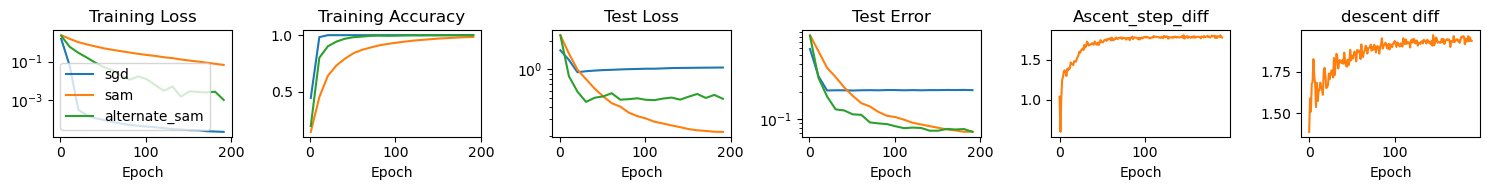

In [1]:
from plot_functions import plot_figures_opts_attrs, plot_figures_opts, plot_figure_cos_descent_ascent
from main import graphs

lr, dataset_name, loss_name, momentum, weight_decay, batch_size, width, epochs = 0.02, "cifar", 'CrossEntropyLoss', 0.9, 0, 512, 8, 200
model_name = "WideResNet"
model_params = {}
#model_params["sam"] = {"feat_dim":50, "train_size": train_size, "sam_rho":0.2}
model_params["sam"] = { "width": width, "base_opt": "sgd","sam_rho":0.5 }
model_params["sgd"] = {"width": width}
model_params["look_sam_v2"] = {"width": width, "base_opt": "sgd","sam_rho":0.5, "look_alpha": 0.2}
model_params["look_sam"] = {"width": width, "base_opt": "sgd","sam_rho":0.05, "look_alpha": 0.2}
model_params["replay_sam"] = {"width": width, "base_opt": "sgd","sam_rho":0.5}
model_params["alternate_sam"] = {"width": width, "base_opt": "sgd","sam_rho":0.5, "look_alpha": 3.0}
#model_params["norm-sgd-0.1"] = {"norm_lr": 0.05, "feat_dim":30, "train_size": train_size}

opt_params = {}
opt_params['sam'] = {'lr':  lr, 'dataset_name':dataset_name, 'loss': loss_name, 'opt':'sam', 'model_name':model_name, 'momentum':momentum, 'weight_decay':weight_decay, 'batch_size':batch_size, 'epochs':epochs}
opt_params['sgd'] = {'lr': lr, 'dataset_name':dataset_name, 'loss': loss_name, 'opt':'sgd', 'model_name':model_name, 'momentum':momentum, 'weight_decay':weight_decay, 'batch_size':batch_size, 'epochs':epochs}
opt_params['look_sam_v2'] = {"adv_eta":0.01, 'lr': lr, 'dataset_name':dataset_name, 'loss': loss_name, 'opt':'look_sam_v2', 'model_name':model_name, 'momentum':momentum, 'weight_decay':weight_decay, 'batch_size':batch_size, 'epochs':epochs}
opt_params['look_sam'] = {"adv_eta":0.01, 'lr': lr, 'dataset_name':dataset_name, 'loss': loss_name, 'opt':'look_sam', 'model_name':model_name, 'momentum':momentum, 'weight_decay':weight_decay, 'batch_size':batch_size, 'epochs':epochs}
opt_params['replay_sam'] = {'lr': lr, 'dataset_name':dataset_name, 'loss': loss_name, 'opt':'replay_sam', 'model_name':model_name, 'momentum':momentum, 'weight_decay':weight_decay, 'batch_size':batch_size, 'epochs':epochs}
opt_params['alternate_sam'] = {'lr': lr, 'dataset_name':dataset_name, 'loss': loss_name, 'opt':'alternate_sam', 'model_name':model_name, 'momentum':momentum, 'weight_decay':weight_decay, 'batch_size':batch_size, 'epochs':epochs}


plot_figures_opts_attrs(['sgd', 'sam', 'alternate_sam'], model_params, opt_params, attrs=["loss", "acc", "test_loss", "test_err", "ascent_diff", "descent_diff"])
#plot_figures_opts(['sgd',  'replay_sam', 'sam'], model_params, opt_params)
#plot_figure_cos_descent_ascent(['sam'], model_params, opt_params)
#plot_figure_cos_descent_ascent(['replay_sam'], model_params, opt_params)

results/cifar/CrossEntropyLoss/sgd/WideResNet/width_8/lr_0.02/moment_0.9/wd_0/batch_size_512/epoch_200/run_0/
results/cifar/CrossEntropyLoss/sam/WideResNet/width_8/base_opt_sgd/sam_rho_0.5/lr_0.02/moment_0.9/wd_0/batch_size_512/epoch_200/run_0/
results/cifar/CrossEntropyLoss/alternate_sam/WideResNet/width_8/base_opt_sgd/sam_rho_0.5/look_alpha_0.7/lr_0.02/moment_0.9/wd_0/batch_size_512/epoch_200/run_0/
results/cifar/CrossEntropyLoss/alternate_sam_v3/WideResNet/width_8/base_opt_sgd/sam_rho_0.5/look_alpha_0.7/lr_0.02/moment_0.9/wd_0/batch_size_512/epoch_200/run_0/


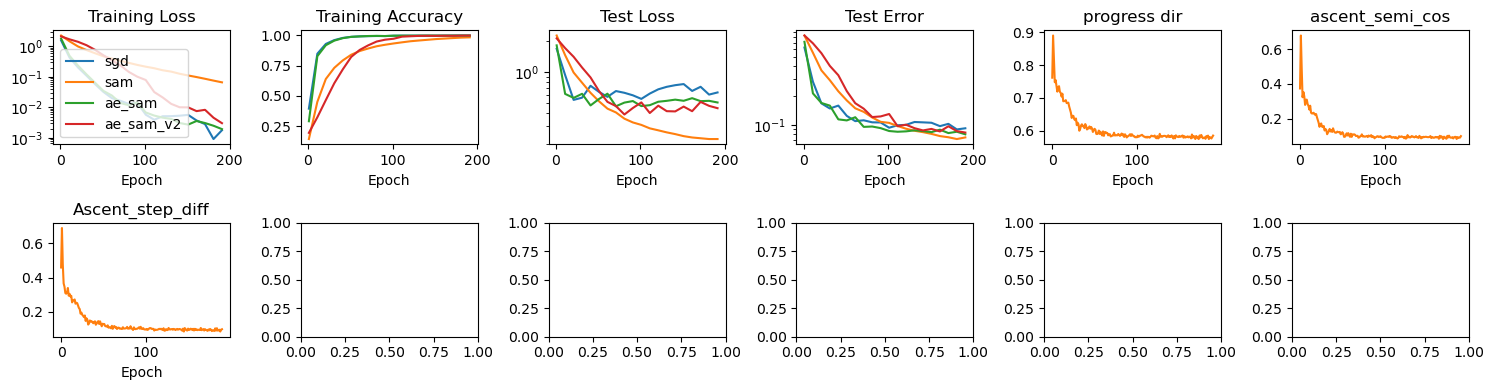

In [12]:
from plot_functions import plot_figures_opts_attrs, plot_figures_opts, plot_figure_cos_descent_ascent
from main import graphs

lr, dataset_name, loss_name, momentum, weight_decay, batch_size, width, epochs = 0.02, "cifar", 'CrossEntropyLoss', 0.9, 0, 512, 8, 200
model_name = "WideResNet"
model_params = {}
#model_params["sam"] = {"feat_dim":50, "train_size": train_size, "sam_rho":0.2}
model_params["sam"] = { "width": width, "base_opt": "sgd","sam_rho":0.5 }
model_params["sgd"] = {"width": width}
model_params["look_sam_v2"] = {"width": width, "base_opt": "sgd","sam_rho":0.5, "look_alpha": 0.2}
model_params["look_sam"] = {"width": width, "base_opt": "sgd","sam_rho":0.05, "look_alpha": 0.2}
model_params["replay_sam"] = {"width": width, "base_opt": "sgd","sam_rho":0.5}
model_params["ae_sam"] = {"width": width, "base_opt": "sgd","sam_rho":0.5, "look_alpha": 0.7}
model_params["ae_sam_v2"] = {"width": width, "base_opt": "sgd","sam_rho":0.5, "look_alpha": 0.7}
#model_params["norm-sgd-0.1"] = {"norm_lr": 0.05, "feat_dim":30, "train_size": train_size}

opt_params = {}
opt_params['sam'] = {'lr':  lr, 'dataset_name':dataset_name, 'loss': loss_name, 'opt':'sam', 'model_name':model_name, 'momentum':momentum, 'weight_decay':weight_decay, 'batch_size':batch_size, 'epochs':epochs}
opt_params['sgd'] = {'lr': lr, 'dataset_name':dataset_name, 'loss': loss_name, 'opt':'sgd', 'model_name':model_name, 'momentum':momentum, 'weight_decay':weight_decay, 'batch_size':batch_size, 'epochs':epochs}
opt_params['look_sam_v2'] = {"adv_eta":0.01, 'lr': lr, 'dataset_name':dataset_name, 'loss': loss_name, 'opt':'look_sam_v2', 'model_name':model_name, 'momentum':momentum, 'weight_decay':weight_decay, 'batch_size':batch_size, 'epochs':epochs}
opt_params['look_sam'] = {"adv_eta":0.01, 'lr': lr, 'dataset_name':dataset_name, 'loss': loss_name, 'opt':'look_sam', 'model_name':model_name, 'momentum':momentum, 'weight_decay':weight_decay, 'batch_size':batch_size, 'epochs':epochs}
opt_params['replay_sam'] = {'lr': lr, 'dataset_name':dataset_name, 'loss': loss_name, 'opt':'replay_sam', 'model_name':model_name, 'momentum':momentum, 'weight_decay':weight_decay, 'batch_size':batch_size, 'epochs':epochs}
opt_params['ae_sam'] = {'lr': lr, 'dataset_name':dataset_name, 'loss': loss_name, 'opt':'alternate_sam', 'model_name':model_name, 'momentum':momentum, 'weight_decay':weight_decay, 'batch_size':batch_size, 'epochs':epochs}
opt_params['ae_sam_v2'] = {'lr': lr, 'dataset_name':dataset_name, 'loss': loss_name, 'opt':'alternate_sam_v3', 'model_name':model_name, 'momentum':momentum, 'weight_decay':weight_decay, 'batch_size':batch_size, 'epochs':epochs}


plot_figures_opts_attrs(['sgd', 'sam', 'ae_sam', 'ae_sam_v2'], model_params, opt_params, attrs=["loss", "acc", "test_loss", "test_err", "progress_dir", "ascent_diff", "ascent_semi_cos"]) #"ascent_diff" "descent_diff" "ascent_semi_cos"

## EMNIST

[<Axes: > <Axes: > <Axes: > <Axes: > <Axes: > <Axes: > <Axes: > <Axes: >]


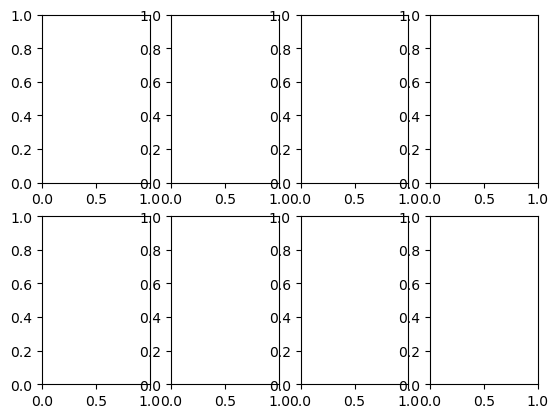

In [3]:
import matplotlib.pyplot as plt
fig, axs = plt.subplots(2,4)
print(axs.reshape(-1))

In [ ]:
python main.py --dataset cifar --model WideResNet --loss CrossEntropyLoss --opt replay_sam --lr 0.3 --epoch 200 --analysis loss eigs --log_interval 10 --batch_size 512 --sam_rho 0.5 --momentum 0.9

In [ ]:
21219 / 26372 - 0.6/0.7

In [ ]:
! python main.py --dataset cifar --model WideResNet --loss CrossEntropyLoss --opt sam_on --lr 0.01 --epoch 200 --analysis loss --log_interval 10 --batch_size 512 --momentum 0.9 --base_opt sgd --sam_rho 0.5
! python main.py --dataset cifar --model WideResNet --loss CrossEntropyLoss --opt sam_on --lr 0.01 --epoch 200 --analysis loss --log_interval 10 --batch_size 512 --momentum 0.9 --base_opt sgd --sam_rho 5

In [ ]:
from plot_functions import plot_figures_opts_attrs, plot_figures_opts, plot_figure_cos_descent_ascent
from main import graphs

lr, dataset_name, loss_name, momentum, weight_decay, batch_size, width, epochs = 0.01, "cifar", 'CrossEntropyLoss', 0.9, 0, 512, 8, 200
model_name = "WideResNet"
model_params = {}
#model_params["sam"] = {"feat_dim":50, "train_size": train_size, "sam_rho":0.2}
model_params["sam"] = { "width": width, "base_opt": "sgd","sam_rho":0.5 }
model_params["sgd"] = {"width": width}
model_params["look_sam_v2"] = {"width": width, "base_opt": "sgd","sam_rho":0.05, "look_alpha": 0.2}
model_params["look_sam"] = {"width": width, "base_opt": "sgd","sam_rho":0.05, "look_alpha": 0.2}
model_params["sam_on"] = {"width": width, "base_opt": "sgd","sam_rho":10.0}
#model_params["norm-sgd-0.1"] = {"norm_lr": 0.05, "feat_dim":30, "train_size": train_size}

opt_params = {}
opt_params['sam'] = {'lr':  lr, 'dataset_name':dataset_name, 'loss': loss_name, 'opt':'sam', 'model_name':model_name, 'momentum':momentum, 'weight_decay':weight_decay, 'batch_size':batch_size, 'epochs':epochs}
opt_params['sgd'] = {'lr': lr, 'dataset_name':dataset_name, 'loss': loss_name, 'opt':'sgd', 'model_name':model_name, 'momentum':momentum, 'weight_decay':weight_decay, 'batch_size':batch_size, 'epochs':epochs}
opt_params['look_sam_v2'] = {"adv_eta":0.01, 'lr': lr, 'dataset_name':dataset_name, 'loss': loss_name, 'opt':'look_sam_v2', 'model_name':model_name, 'momentum':momentum, 'weight_decay':weight_decay, 'batch_size':batch_size, 'epochs':epochs}
opt_params['look_sam'] = {"adv_eta":0.01, 'lr': lr, 'dataset_name':dataset_name, 'loss': loss_name, 'opt':'look_sam', 'model_name':model_name, 'momentum':momentum, 'weight_decay':weight_decay, 'batch_size':batch_size, 'epochs':epochs}
opt_params['sam_on'] = {'lr': lr, 'dataset_name':dataset_name, 'loss': loss_name, 'opt':'sam_on', 'model_name':model_name, 'momentum':momentum, 'weight_decay':weight_decay, 'batch_size':batch_size, 'epochs':epochs}


#plot_figures_opts_attrs(['sgd',  'replay_sam'], model_params, opt_params, attrs=["loss", "test_loss"])
plot_figures_opts_attrs(['sgd', 'sam','sam_on'], model_params, opt_params, attrs=["loss", "acc", "test_loss", "test_acc"])
#plot_figure_cos_descent_ascent(['sam'], model_params, opt_params)

In [ ]:
! python main.py --dataset cifar --model WideResNet --loss CrossEntropyLoss --opt sam_on --lr 0.1 --epoch 200 --analysis loss --log_interval 10 --batch_size 128 --momentum 0.9 --base_opt sgd --sam_rho 0.5 --weight_decay 5e-4 --label_smoothing 0.1
! python main.py --dataset cifar --model WideResNet --loss CrossEntropyLoss --opt sam_on --lr 0.01 --epoch 200 --analysis loss --log_interval 10 --batch_size 512 --momentum 0.9 --base_opt sgd --sam_rho 5

In [ ]:
from plot_functions import plot_figures_opts_attrs, plot_figures_opts, plot_figure_cos_descent_ascent
from main import graphs

lr, dataset_name, loss_name, momentum, weight_decay, batch_size, width, smoothing, epochs = 0.1, "cifar", 'CrossEntropyLoss', 0.9, 5e-4, 128, 8, 0.1, 200
model_name = "WideResNet"
model_params = {}
#model_params["sam"] = {"feat_dim":50, "train_size": train_size, "sam_rho":0.2}
model_params["sam"] = { "width": width, "smooth": smoothing, "base_opt": "sgd","sam_rho":0.5 }
model_params["sgd"] = {"width": width, "smooth": smoothing}
model_params["look_sam_v2"] = {"width": width, "base_opt": "sgd","sam_rho":0.05, "look_alpha": 0.2}
model_params["look_sam"] = {"width": width, "base_opt": "sgd","sam_rho":0.05, "look_alpha": 0.2}
model_params["sam_on"] = {"width": width, "smooth": smoothing, "base_opt": "sgd","sam_rho":0.5}
#model_params["norm-sgd-0.1"] = {"norm_lr": 0.05, "feat_dim":30, "train_size": train_size}

opt_params = {}
opt_params['sam'] = {'lr':  lr, 'dataset_name':dataset_name, 'loss': loss_name, 'opt':'sam', 'model_name':model_name, 'momentum':momentum, 'weight_decay':weight_decay, 'batch_size':batch_size, 'epochs':epochs}
opt_params['sgd'] = {'lr': lr, 'dataset_name':dataset_name, 'loss': loss_name, 'opt':'sgd', 'model_name':model_name, 'momentum':momentum, 'weight_decay':weight_decay, 'batch_size':batch_size, 'epochs':epochs}
opt_params['look_sam_v2'] = {"adv_eta":0.01, 'lr': lr, 'dataset_name':dataset_name, 'loss': loss_name, 'opt':'look_sam_v2', 'model_name':model_name, 'momentum':momentum, 'weight_decay':weight_decay, 'batch_size':batch_size, 'epochs':epochs}
opt_params['look_sam'] = {"adv_eta":0.01, 'lr': lr, 'dataset_name':dataset_name, 'loss': loss_name, 'opt':'look_sam', 'model_name':model_name, 'momentum':momentum, 'weight_decay':weight_decay, 'batch_size':batch_size, 'epochs':epochs}
opt_params['sam_on'] = {'lr': lr, 'dataset_name':dataset_name, 'loss': loss_name, 'opt':'sam_on', 'model_name':model_name, 'momentum':momentum, 'weight_decay':weight_decay, 'batch_size':batch_size, 'epochs':epochs}


#plot_figures_opts_attrs(['sgd',  'replay_sam'], model_params, opt_params, attrs=["loss", "test_loss"])
plot_figures_opts_attrs(['sgd', 'sam','sam_on'], model_params, opt_params, attrs=["loss", "acc", "test_loss", "test_acc"])

In [ ]:
! python main.py --dataset cifar --model resnet18 --loss MSELoss --opt sgd --lr 0.001 --epoch 2000 --analysis loss eigs --log_interval 10 --batch_size 512 --momentum 0.0

In [ ]:
from plot_functions import plot_figures_opts_attrs, plot_figures_opts, plot_figure_cos_descent_ascent
from main import graphs

lr, dataset_name, loss_name, momentum, weight_decay, batch_size, width, epochs = 0.001, "cifar", 'MSELoss', 0.0, 0, 512, 8, 2000
model_name = "resnet18"
model_params = {}
#model_params["sam"] = {"feat_dim":50, "train_size": train_size, "sam_rho":0.2}
model_params["sgd_512"] = {}
model_params["sgd_256"] = {}
#model_params["norm-sgd-0.1"] = {"norm_lr": 0.05, "feat_dim":30, "train_size": train_size}

opt_params = {}

opt_params['sgd_512'] = {'lr': lr, 'dataset_name':dataset_name, 'loss': loss_name, 'opt':'sgd', 'model_name':model_name, 'momentum':momentum, 'weight_decay':weight_decay, 'batch_size':512, 'epochs':epochs}
opt_params['sgd_256'] = {'lr': lr, 'dataset_name':dataset_name, 'loss': loss_name, 'opt':'sgd', 'model_name':model_name, 'momentum':momentum, 'weight_decay':weight_decay, 'batch_size':256, 'epochs':epochs}

#plot_figures_opts_attrs(['sgd',  'replay_sam'], model_params, opt_params, attrs=["loss", "test_loss"])
plot_figures_opts_attrs(['sgd_512', 'sgd_256'], model_params, opt_params, attrs=["loss", "acc", "eigs"])

In [ ]:
from plot_functions import plot_figures_opts_attrs, plot_figures_opts, plot_figure_cos_descent_ascent
from main import graphs

lr, dataset_name, loss_name, momentum, weight_decay, batch_size, width, epochs = 0.001, "cifar", 'MSELoss', 0.0, 0, 512, 8, 2000
model_name = "resnet18"
model_params = {}
#model_params["sam"] = {"feat_dim":50, "train_size": train_size, "sam_rho":0.2}
model_params["sgd_512"] = {}
model_params["sgd_256"] = {}
#model_params["norm-sgd-0.1"] = {"norm_lr": 0.05, "feat_dim":30, "train_size": train_size}

opt_params = {}

opt_params['sgd_512'] = {'lr': lr, 'dataset_name':dataset_name, 'loss': loss_name, 'opt':'sgd', 'model_name':model_name, 'momentum':momentum, 'weight_decay':weight_decay, 'batch_size':512, 'epochs':epochs}
opt_params['sgd_256'] = {'lr': lr, 'dataset_name':dataset_name, 'loss': loss_name, 'opt':'sgd', 'model_name':model_name, 'momentum':momentum, 'weight_decay':weight_decay, 'batch_size':256, 'epochs':epochs}

#plot_figures_opts_attrs(['sgd',  'replay_sam'], model_params, opt_params, attrs=["loss", "test_loss"])
plot_figures_opts_attrs(['sgd_512', 'sgd_256'], model_params, opt_params, attrs=["loss", "acc", "eigs"])

In [ ]:
from plot_functions import plot_figures_opts_attrs, plot_figures_opts, plot_figure_cos_descent_ascent
from main import graphs

lr, dataset_name, loss_name, momentum, weight_decay, batch_size, width, epochs = 0.001, "cifar", 'CrossEntropyLoss', 0.0, 0, 512, 8, 1000
model_name = "resnet18"
model_params = {}
#model_params["sam"] = {"feat_dim":50, "train_size": train_size, "sam_rho":0.2}
model_params["sgd_512"] = {}
model_params["sgd_256"] = {}
model_params["sgd_128"] = {}
#model_params["norm-sgd-0.1"] = {"norm_lr": 0.05, "feat_dim":30, "train_size": train_size}

opt_params = {}

opt_params['sgd_512'] = {'lr': lr, 'dataset_name':dataset_name, 'loss': loss_name, 'opt':'sgd', 'model_name':model_name, 'momentum':momentum, 'weight_decay':weight_decay, 'batch_size':512, 'epochs':epochs}
opt_params['sgd_256'] = {'lr': lr, 'dataset_name':dataset_name, 'loss': loss_name, 'opt':'sgd', 'model_name':model_name, 'momentum':momentum, 'weight_decay':weight_decay, 'batch_size':256, 'epochs':epochs}
opt_params['sgd_128'] = {'lr': lr, 'dataset_name':dataset_name, 'loss': loss_name, 'opt':'sgd', 'model_name':model_name, 'momentum':momentum, 'weight_decay':weight_decay, 'batch_size':128, 'epochs':2000}

#plot_figures_opts_attrs(['sgd',  'replay_sam'], model_params, opt_params, attrs=["loss", "test_loss"])
plot_figures_opts_attrs(['sgd_128', 'sgd_256','sgd_512'], model_params, opt_params, attrs=["loss", "acc", "eigs"])

In [ ]:
! python main.py --dataset mnist_cifar --model resnet18 --loss CrossEntropyLoss --opt sgd --lr 0.05 --epoch 1000 --analysis loss eigs --log_interval 10 --batch_size 128 --momentum 0.0 --weight_decay 5e-4 --base_opt sgd --sam_rho 0.8

In [ ]:
from plot_functions import plot_figures_opts_attrs, plot_figures_opts, plot_figure_cos_descent_ascent
from main import graphs

lr, dataset_name, loss_name, momentum, weight_decay, batch_size, width, epochs = 0.05, "mnist_cifar", 'CrossEntropyLoss', 0.0, 5e-4, 128, 8, 1000
model_name = "resnet18"
model_params = {}
#model_params["sam"] = {"feat_dim":50, "train_size": train_size, "sam_rho":0.2}
model_params["sgd"] = {}
model_params["sgd_256"] = {}
model_params["sam"] = {"base_opt":"sgd", "sam_rho": 0.8}
#model_params["norm-sgd-0.1"] = {"norm_lr": 0.05, "feat_dim":30, "train_size": train_size}

opt_params = {}

opt_params['sgd'] = {'lr': lr, 'dataset_name':dataset_name, 'loss': loss_name, 'opt':'sgd', 'model_name':model_name, 'momentum':momentum, 'weight_decay':weight_decay, 'batch_size':batch_size, 'epochs':epochs}
opt_params['sgd_256'] = {'lr': lr, 'dataset_name':dataset_name, 'loss': loss_name, 'opt':'sgd', 'model_name':model_name, 'momentum':momentum, 'weight_decay':weight_decay, 'batch_size':256, 'epochs':epochs}
opt_params['sam'] = {'lr': lr, 'dataset_name':dataset_name, 'loss': loss_name, 'opt':'sam', 'model_name':model_name, 'momentum':momentum, 'weight_decay':weight_decay, 'batch_size':batch_size, 'epochs':epochs}

#plot_figures_opts_attrs(['sgd',  'replay_sam'], model_params, opt_params, attrs=["loss", "test_loss"])
plot_figures_opts_attrs(['sgd'], model_params, opt_params, attrs=["loss", "acc", "eigs"])

In [ ]:
! python main.py --dataset cifar --model WideResNet --loss CrossEntropyLoss --opt sam --lr 0.01 --epoch 200 --analysis loss eigs adv_eigs --log_interval 10 --batch_size 128 --sam_rho 0.05 --momentum 0.9 --adv_eta 0.01

results/cifar/CrossEntropyLoss/sam/WideResNet/width_8/base_opt_sgd/sam_rho_0.05/lr_0.01/moment_0.9/wd_0.0005/batch_size_128/epoch_200/run_0/


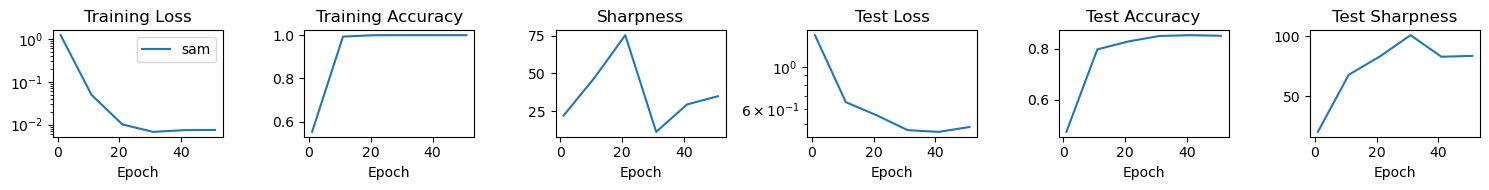

In [3]:
from plot_functions import plot_figures_opts, plot_figures_opts_attrs
from main import graphs

lr, dataset_name, loss_name, momentum, weight_decay, batch_size, width_factor, epochs = 0.01, "cifar", 'CrossEntropyLoss', 0.9, 0.0005, 128, 8, 200
model_name = "WideResNet"
model_params = {}
#model_params["sam"] = {"feat_dim":50, "train_size": train_size, "sam_rho":0.2}
model_params["sam"] = {"width": width_factor, "base_opt": "sgd","sam_rho":0.05}
#model_params["sam"] = {"base_opt": "adam","sam_rho":2.0, "sam": "adaptive"}
model_params["sgd"] = {"width": width_factor}
model_params["norm-sgd-0.001"] = {'width':width_factor, "base_opt": "sgd", "norm_lr": 0.001}
model_params["adahessian"] = {"width":width_factor}
#model_params["norm-sgd-0.1"] = {"norm_lr": 0.05, "feat_dim":30, "train_size": train_size}

opt_params = {}
opt_params['sam'] = {"adv_eta":0.01, 'lr': lr, 'dataset_name':dataset_name, 'loss': loss_name, 'opt':'sam', 'model_name':model_name, 'momentum':momentum, 'weight_decay':weight_decay, 'batch_size':batch_size, 'epochs':epochs}
opt_params['sgd'] = {"adv_eta":0.01, 'lr': lr, 'dataset_name':dataset_name, 'loss': loss_name, 'opt':'sgd', 'model_name':model_name, 'momentum':momentum, 'weight_decay':weight_decay, 'batch_size':batch_size, 'epochs':epochs}
opt_params['norm-sgd-0.001'] = {"adv_eta":0.01, 'lr': lr, 'dataset_name':dataset_name, 'loss': loss_name, 'opt':'norm-sgd', 'model_name':model_name, 'momentum':momentum, 'weight_decay':weight_decay, 'batch_size':batch_size, 'epochs':epochs}
opt_params['norm-sgd-0.1'] = {"adv_eta":0.01, 'lr': lr, 'dataset_name':dataset_name, 'loss': loss_name, 'opt':'norm-sgd', 'model_name':model_name, 'momentum':momentum, 'weight_decay':weight_decay, 'batch_size':batch_size, 'epochs':epochs}
opt_params['adahessian'] = {"adv_eta":0.01, 'lr': lr, 'dataset_name':dataset_name, 'loss': loss_name, 'opt':'adahessian', 'model_name':model_name, 'momentum':momentum, 'weight_decay':weight_decay, 'batch_size':batch_size, 'epochs':epochs}

#plot_figures_opts(["sgd", "norm-sgd-0.001", "sam", 'adahessian'], model_params, opt_params)
plot_figures_opts_attrs(['sam'], model_params, opt_params, attrs=["loss", "acc", "test_loss", "test_acc", "eigs", "test_eigs"])